# Linear Algebra Assignment

In [1]:
# Importing necessary Libraries and modules to perform EDA on Credit card Fraud detection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# To ignore all warnings
warnings.filterwarnings('ignore')
import math 

In [2]:
#Reading the credit card csv file into dfccfraud data frame.
dfccfraud = pd.read_csv('creditcard.csv')

In [3]:
# Displaying the initial data in the credit card dataset.
dfccfraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Converting time from seconds to hours
dfccfraud['timeInHours'] = dfccfraud['Time'] / (60 * 60)
dfccfraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timeInHours
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556


In [5]:
dfccfraud.shape

(284807, 32)

# Observation:
1) The credit card dataset has 284807 rows and 31 features. The 32nd feature is timeInHours which is same as time.

In [6]:
dfccfraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timeInHours
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727,26.337183
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,13.191152
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,15.055972
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,23.525556
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,38.700139
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,47.997778


# Observations:

1) From timeInHours column we can observe that the transactions are over a two day period. i.e 48 hours.Since min value is 0 and max is 48.  
2) Mean time and median time between transactions is almost same, hence we can conclude that the dataset has significant outliers.  
3) Maximum amount withdrawn is 25,600 and min is 0. Mean amount is 88 and median is 22. Hence there is a vast difference between the mean amount and median amount. Thus we can conclude that, there are many outliers in amount column.   
4) Class column has two values 0 and 1, where 0 indicates non Fraudulent transaction and 1 indicates Fraudulent transaction.


# Objective:

To determine whether a transaction is a Fraudulant or an non Fraudulant transaction from a given set of features.

In [7]:
# To print the columns or features of the credit card dataset.
dfccfraud.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'timeInHours'],
      dtype='object')

In [8]:
dfccfraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
Time           284807 non-null float64
V1             284807 non-null float64
V2             284807 non-null float64
V3             284807 non-null float64
V4             284807 non-null float64
V5             284807 non-null float64
V6             284807 non-null float64
V7             284807 non-null float64
V8             284807 non-null float64
V9             284807 non-null float64
V10            284807 non-null float64
V11            284807 non-null float64
V12            284807 non-null float64
V13            284807 non-null float64
V14            284807 non-null float64
V15            284807 non-null float64
V16            284807 non-null float64
V17            284807 non-null float64
V18            284807 non-null float64
V19            284807 non-null float64
V20            284807 non-null float64
V21            284807 non-null float64
V22            284807 non-null 

# Observation:
1) All the featurs have float64 data except class which has integer data. Also all the features has no null elements.

Number of Non Fraudulant Transactions 0 and Fraudulant Transaction 1 : 0    284315
1       492
Name: Class, dtype: int64


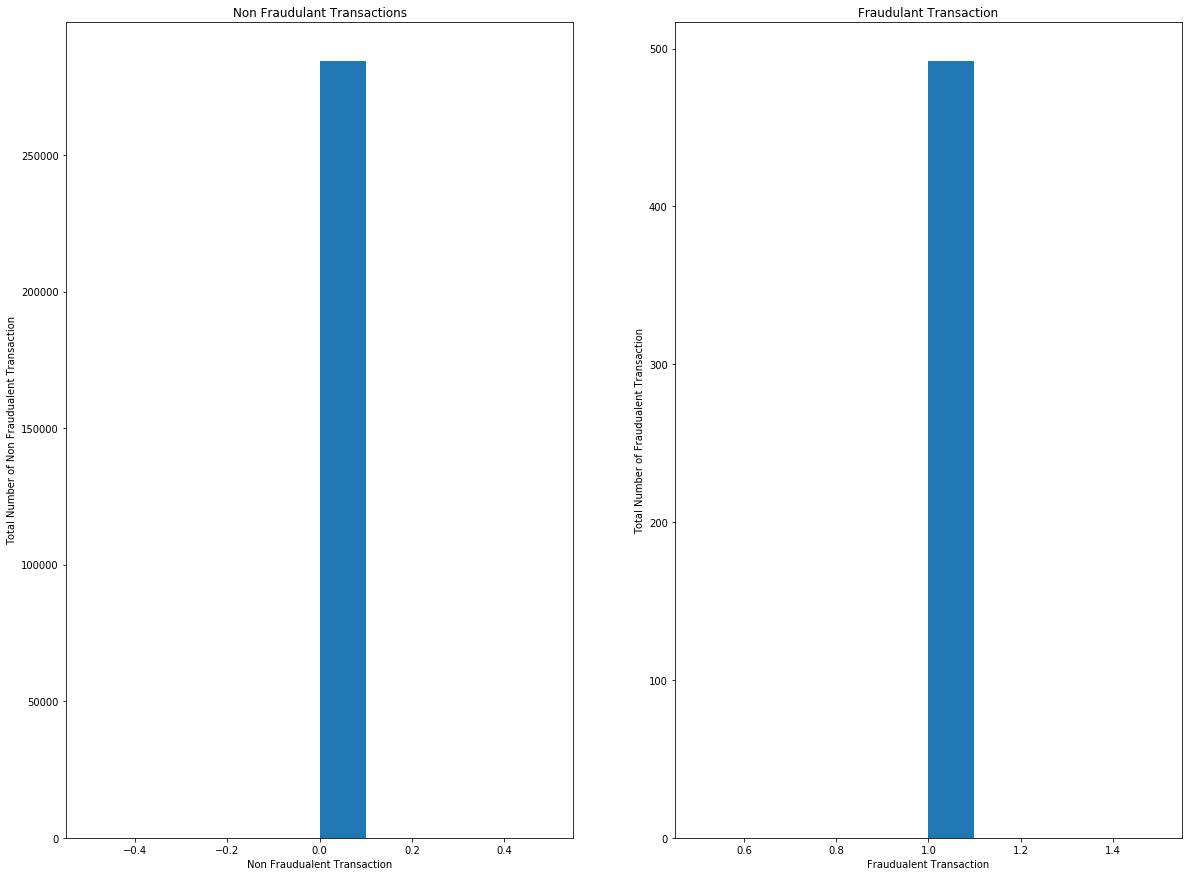

In [9]:
#To plot the histogram of class column, which has two values 0 and 1 which indicates non fraudulant and fraudulant transactions
plt.figure(figsize= (20,15)) # To fix the size of the figure.
print("Number of Non Fraudulant Transactions 0 and Fraudulant Transaction 1 :",dfccfraud['Class'].value_counts(0)) # To print number of non fraudulant and fraudulant transactions.
positiveTrans = dfccfraud[dfccfraud['Class'] == 0] # To create a data frame for all non fraudulant transactions.
fraudTrans = dfccfraud[dfccfraud['Class'] == 1] # To create a data frame for all fraudulant transactions.
plt.subplot(1,2,1)
plt.hist(x = positiveTrans['Class'] ) # To plot the histogram of non fraudulant transactions.
plt.xlabel('Non Fraudualent Transaction')
plt.ylabel('Total Number of Non Fraudualent Transaction')
plt.title('Non Fraudulant Transactions')
plt.subplot(1,2,2)
plt.hist(x = fraudTrans['Class']) # To plot the histogram of fraudulant transactions.
plt.xlabel('Fraudualent Transaction')
plt.ylabel('Total Number of Fraudualent Transaction')
plt.title('Fraudulant Transaction')
plt.show()


# Observation:

The credit card dataset has 284315 non fraudulent transactions and 492 fraudulent transactions, hence it is a imbalance dataset.

In [10]:
positiveTrans.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timeInHours
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556


In [11]:
positiveTrans.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timeInHours
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0,284315.000000
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0,26.343945
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0,13.190004
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0,0.000000
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0,15.063889
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0,23.530833
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0,38.703611
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0,47.997778


# Observations:
1) Mean time and median time for non Fraudulent transcation is almost same, indicating very few outliers.  
2) Minimum time and max time for Fraudulent transaction is 0 and 48 hours, indicating transactions for two full days.  
3) Standard deviation is very high for Amount.  
4) Mean amount and median amount has a very high difference, indicating high number of outliers in the amount data set for non Fraudulent transactions.  

In [12]:
fraudTrans.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timeInHours
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,0.112778
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,0.131111
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,1.239444
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,1.940556
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,2.088611


In [13]:
fraudTrans.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timeInHours
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0,492.000000
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0,22.429669
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0,13.287601
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0,0.112778
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0,11.455972
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0,20.991250
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0,35.689722
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0,47.318889


# Observations:
1) The mean and median time in hours for Fraudulent transaction is 22 and 20 respectively. Hence indicating very few number of outliers.  
2) The mean and the median amount are 122 and 105 respectively again indicating that there are very few number of outliers in amount of fraud dataset.

# Univariate Analysis

In [14]:
def pdf(num1):
    """Function to calculate the PDF of num1"""
    return num1 / sum(num1)

def cdf(num2):
    """Function to calculate the CDF of num2"""
    return np.cumsum(num2)
def displayPlots(labelx,dataframename,dataframename1, dataframename2):
    """Function to plot the distplot, CDF, PDF and Boxplot for Non Fraudulant and Fraudulant Transactions"""
    plt.subplots_adjust(top = 5,wspace = 0.2) # Function to adjust the width of subplots
    plt.figure(figsize= (15,10)) # Function to adjust the figure size.
    plt.subplot(2,2,1)
    # To plot the dist plot of Non Fraudulent and Fraudulent Transaction
    sns.distplot(dataframename1[labelx],label = 'Non Fraudulant Transaction')
    sns.distplot(dataframename2[labelx], label = 'Fraudulant Transaction')
    plt.title("Distplot of Fraudulent and Non fraudulent transactions")
    plt.legend()
    
    # Program to determine the histogram and compute the pdf and cdf for Non Fraudulent and Fraudulent transaction.
    counts, binsize = np.histogram(dataframename1[labelx])
    pdf1 = pdf(counts)
    cdf1 = cdf(pdf1)
    print(binsize)
    counts2, binsize2 = np.histogram(dataframename2[labelx])
    pdf2 = pdf(counts2)
    cdf2 = cdf(pdf2)
    print(binsize2)
    
    # Program to plot the pdf and cdf of Non Fraudulent and Fraudulent transactions
    plt.subplot(2,2,2)
    plt.plot(binsize[1:],pdf1, label = 'pdf of Non Fraudulant Transaction')
    plt.plot(binsize[1:],cdf1, label = 'cdf of Non Fraudulant Transaction')
    plt.plot(binsize2[1:],pdf2, label = 'pdf of Fraudulant Transaction')
    plt.plot(binsize2[1:],cdf2, label = 'cdf of Fraudulant Transaction')
    plt.xlabel(labelx)
    plt.title("CDF and PDF of Fraudulent and Non fraudulent transactions")
    plt.legend()
    
    # Program to plot the Boxplot
    plt.subplot(2,2,3)
    sns.boxplot(x = 'Class', y = labelx, data = dataframename, hue = 'Class')
    plt.title("Box plot of Fraudulent and Non fraudulent transactions")
    plt.legend()
    return

[ 0.          4.79977778  9.59955556 14.39933333 19.19911111 23.99888889
 28.79866667 33.59844444 38.39822222 43.198      47.99777778]
[ 0.11277778  4.83338889  9.554      14.27461111 18.99522222 23.71583333
 28.43644444 33.15705556 37.87766667 42.59827778 47.31888889]


<Figure size 432x288 with 0 Axes>

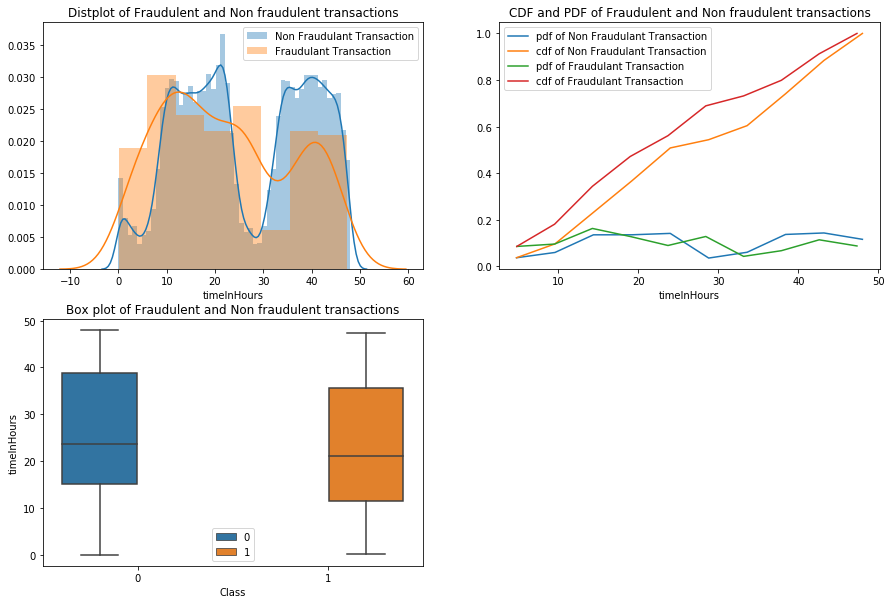

In [15]:
displayPlots(labelx = 'timeInHours', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:
1) From the dist plot for time, it is clear that non Fraudulent transactions are done for two successive days. Day 1 from 0 to      24hour and day 2 from 25 to 48 hour.  
2) From the dist plot we can see that non Fraudulent transaction have a peak froom 10:00am to 09:00pm (21:00) with max peak at      09:00pm(21:00 hour). Similar pattern is alos repeated on the second day from 10:00pm (35:00) to 10:00pm(46:00).  
3) From the distplot, we can observe that Fraudulent transactions have a peak at 10:00am (10:00) on day 1 and gradually            decreases which continues till the second day till 7:00am(31:00) and again starts increasing gradually after 7:00(31:00) on      day2. On Day 2 Fraudulent transactions have a peak at 3:00pm(40:00).  
4) From Distplot of Non Fraudulent and Fraudulent transaction for time, it very difficult to predict whether a given transaction is fraud or not based on the time at which transactiomn was done.
5) From PDF and CDF plot too, its very difficult to predict whether the transaction is fraud or not based on the time at which transaction was done.  
6) From Box plot we see that around 37% of fraud transactions and 25% of non fraudulant transactions are before 3:00pm on day 1.  
7) From box plot around 7% of the non Fraudulent transactions are after 2:00pm on day 2.  
8) At the end after looking at all the three plots, we can say that its very difficult to predict whether a given transaction is fraud or not based on time.  

[-56.40750963 -50.52126567 -44.63502171 -38.74877774 -32.86253378
 -26.97628982 -21.09004586 -15.2038019   -9.31755793  -3.43131397
   2.45492999]
[-30.55238004 -27.28390344 -24.01542683 -20.74695022 -17.47847362
 -14.20999701 -10.9415204   -7.6730438   -4.40456719  -1.13609059
   2.13238602]


<Figure size 432x288 with 0 Axes>

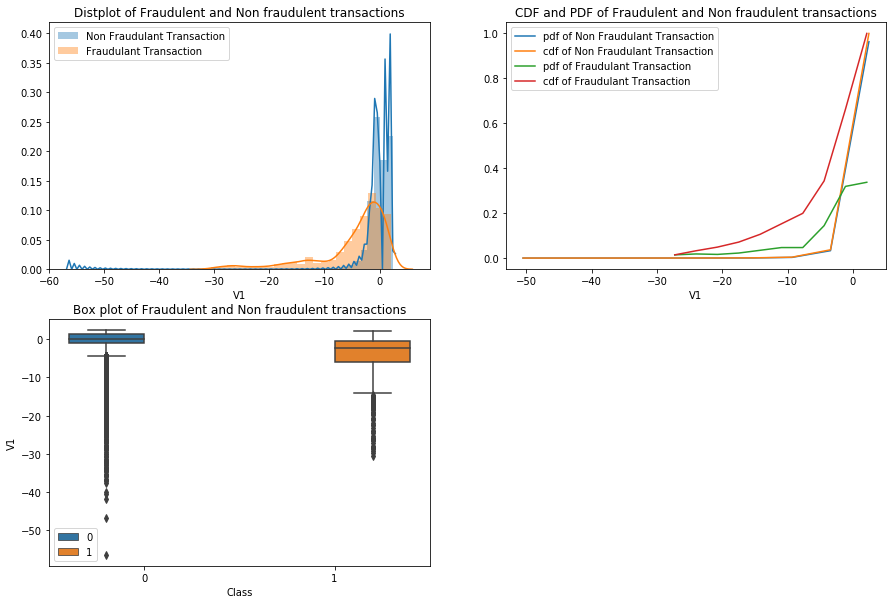

In [16]:
displayPlots(labelx = 'V1', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

1) From dist plot is very difficult to predict whether the given transaction is fraud or not from V1 feature.  
2) From CDF and PDF plot, we see that around 98     (0.2 x 492) transactions are fraud for V1 below -10. After -10, its very difficult to predict whether the given transaction is fruad or not.  
3) From the box plot it is clear that, 75% of the fraud transactions are below -2 and non Fraudulent transaction 50% are lying within +1 to -1.   
4) From box plot we also see that there are many outliers below the minimum point for both non Fraudulent and Fraudulent.  

[-72.71572756 -63.55390952 -54.39209148 -45.23027344 -36.0684554
 -26.90663736 -17.74481932  -8.58300128   0.57881676   9.7406348
  18.90245284]
[-8.40215368 -5.35616541 -2.31017714  0.73581112  3.78179939  6.82778766
  9.87377592 12.91976419 15.96575246 19.01174072 22.05772899]


<Figure size 432x288 with 0 Axes>

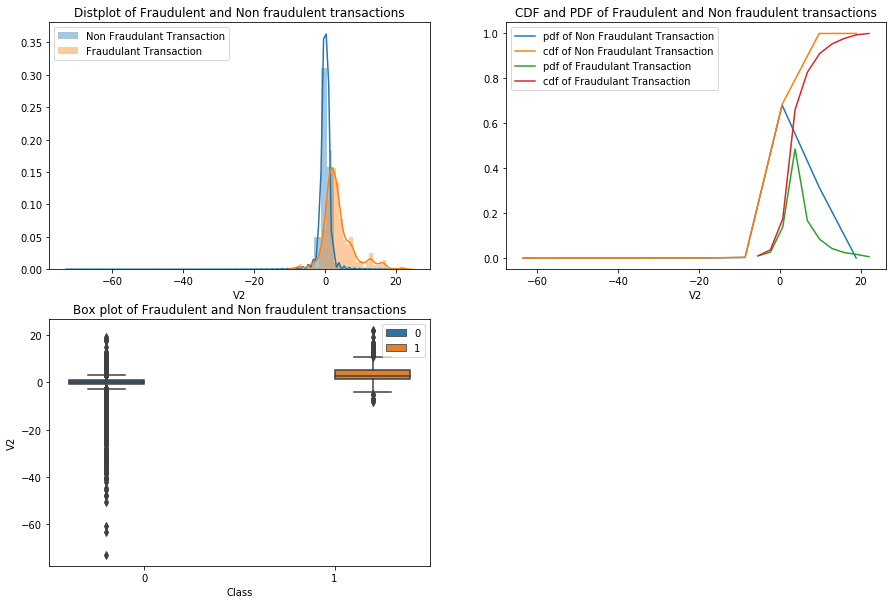

In [17]:
displayPlots(labelx = 'V2', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

1)In Distplot, Fraudulent and non Fraudulent plots overlap, hence its very difficult to predict whether a given transaction is Fraudulent or not from distplot for V2.  
2) From CDF and PDF plot, we see that between -5 to -10 around 56,863 (0.2 x 284315) non Fraudulent transactions have taken. Above -5 point, its very difficult to predict, whether the given transaction is fraudulant or not.  
3) From Box plot,50% i.e 1,42,157 transactions are non Fraudulent transactions between +1 and -1 and 50 % i.e 246 transactions are Fraudulent transactions between 2 and 5. There are many outliers above and below for non Fraudulent transactions as compared to Fraudulent. To certain extend we can predict whether a given transaction is Fraudulent or not by using box plot for V2 feature. Accuracy though will be less.

[-48.32558936 -42.55477458 -36.7839598  -31.01314502 -25.24233024
 -19.47151546 -13.70070069  -7.92988591  -2.15907113   3.61174365
   9.38255843]
[-31.10368482 -27.76829538 -24.43290593 -21.09751649 -17.76212704
 -14.42673759 -11.09134815  -7.7559587   -4.42056926  -1.08517981
   2.25020963]


<Figure size 432x288 with 0 Axes>

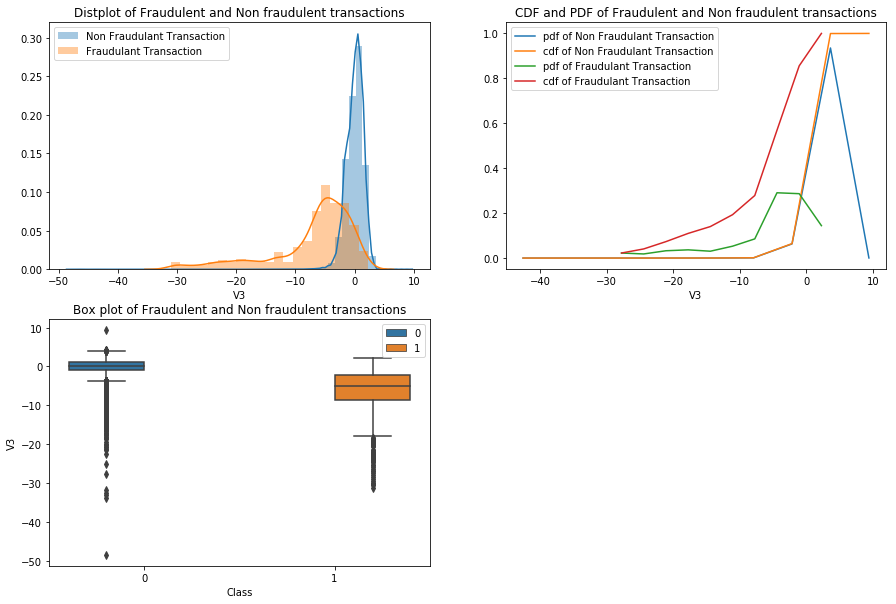

In [18]:
displayPlots(labelx = 'V3', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:
1) From distplot, cdf and pdf plot, we see that for V3 less than -8 transactions made are fraudulant. Above -8 for V3 its very difficult to predict whether a transaction is fraudulent or not.  
2) From box plot we note that 75% of transactions are fraudulent, which is around 369 transactions are fraudulent of total 492. From boxplot we also see that, there are many outliers on the lower side of box plot.

[-5.6831712  -3.42731967 -1.17146815  1.08438337  3.34023489  5.59608642
  7.85193794 10.10778946 12.36364099 14.61949251 16.87534403]
[-1.31327481  0.02951985  1.37231452  2.71510918  4.05790385  5.40069851
  6.74349318  8.08628785  9.42908251 10.77187718 12.11467184]


<Figure size 432x288 with 0 Axes>

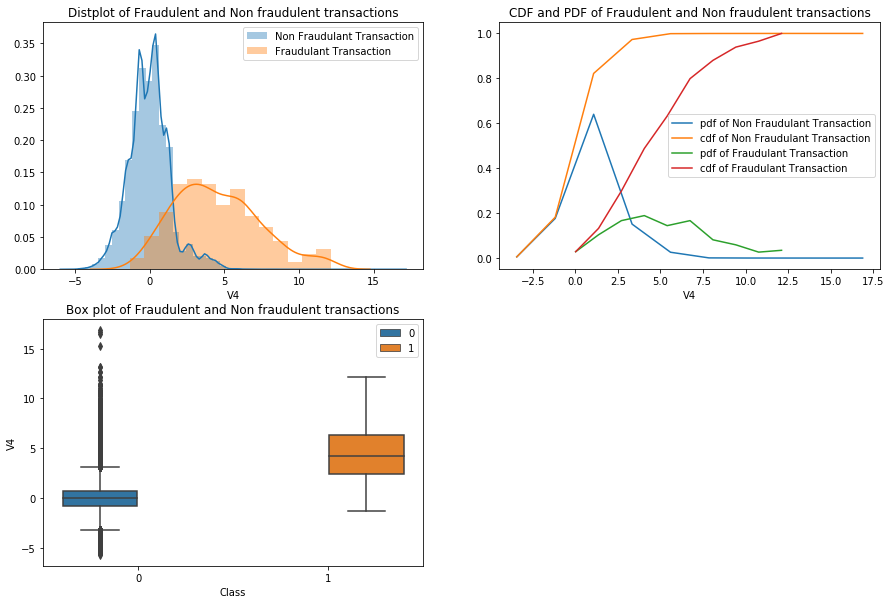

In [19]:
displayPlots(labelx = 'V4', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:
1) From dist plot we note that for V4 above 5 all the transactions are fraudulent.    
2) From cdf and pdf plot, we see that cdf is around 0.5 for V4 below 0, that is around 14158 are non fraudulent transactions. 
3) From box plot we see that 50% of non fraudulent transactions for V4 are between +1 and -1. we see that non fraudulent transactions are many outliers above and below. There are 50% of fraudulent transactions i.e around 246 are between +2 and +7.

[-113.74330671  -98.88880945  -84.03431219  -69.17981493  -54.32531768
  -39.47082042  -24.61632316   -9.7618259     5.09267136   19.94716862
   34.80166588]
[-22.10553152 -18.78546951 -15.4654075  -12.14534549  -8.82528347
  -5.50522146  -2.18515945   1.13490256   4.45496458   7.77502659
  11.0950886 ]


<Figure size 432x288 with 0 Axes>

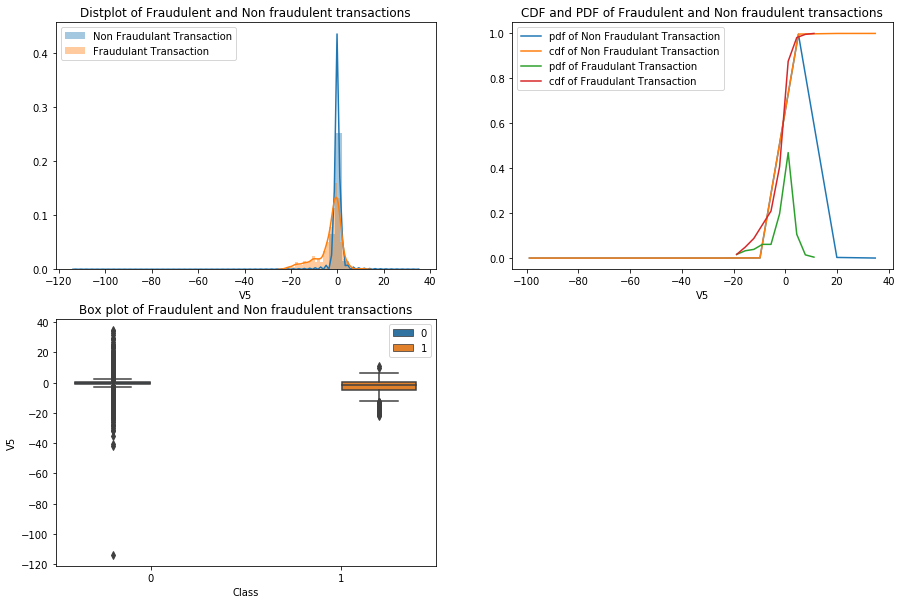

In [20]:
displayPlots(labelx = 'V5', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:
1) From distplot, its very difficult to predict whether a transaction is a fraudulent or not.  
2) From cdf and pdf plot, we see that around 49 (492 * 0.1 ) fraudulent transactions are there for V5 below -10.  
3) From box plot we see that there are outliers in V5. Also its very difficult to predict whether a transaction is a fraudulent or not.


[-26.16050594 -16.21429279  -6.26807964   3.67813351  13.62434666
  23.57055981  33.51677295  43.4629861   53.40919925  63.3554124
  73.30162555]
[-6.40626663 -5.11822851 -3.83019038 -2.54215226 -1.25411413  0.033924
  1.32196212  2.61000025  3.89803838  5.1860765   6.47411463]


<Figure size 432x288 with 0 Axes>

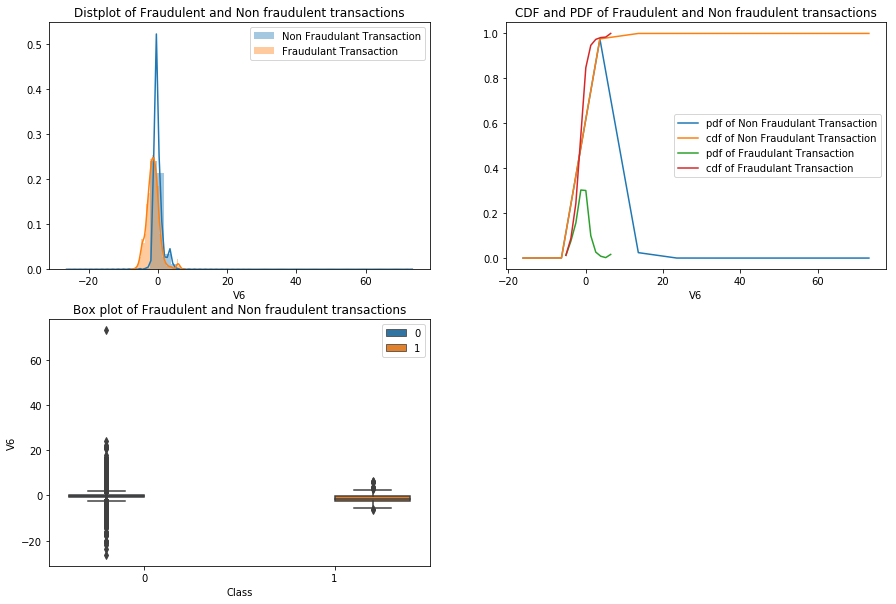

In [21]:
displayPlots(labelx = 'V6', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observation:

Very Difficult to predict whether a transaction is fraudulent or not from all the three plots.

[-31.76494649 -16.52950245  -1.2940584   13.94138564  29.17682968
  44.41227373  59.64771777  74.88316181  90.11860586 105.3540499
 120.58949395]
[-43.55724157 -38.62126368 -33.68528579 -28.74930789 -23.81333
 -18.87735211 -13.94137422  -9.00539632  -4.06941843   0.86655946
   5.80253735]


<Figure size 432x288 with 0 Axes>

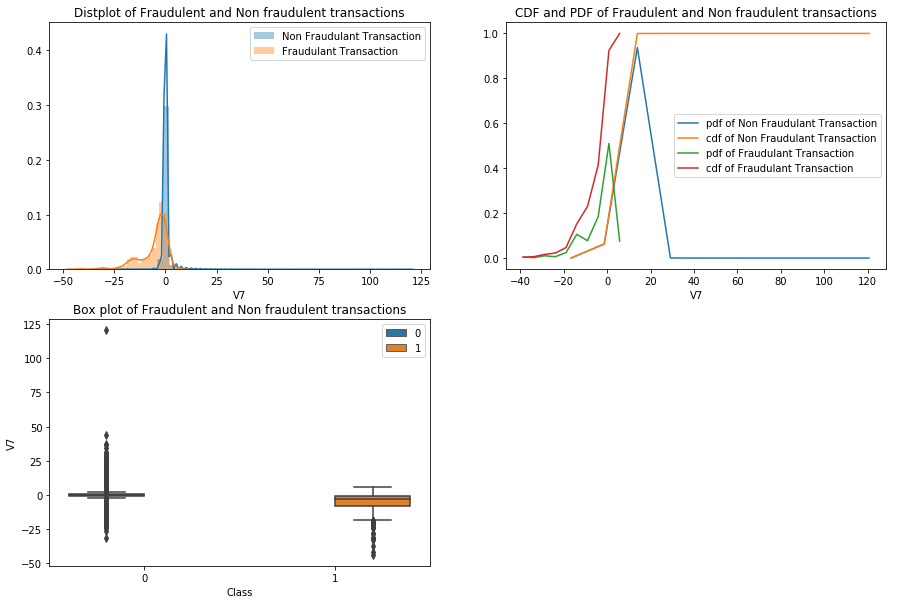

In [22]:
displayPlots(labelx = 'V7', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observation:

1) Very difficult to predict whether a given transaction is a fraudulent or not from all the three plots.  
2) Also from box plot we see that there are outliers in both fraudulent and non fraudulent transactions.

[-73.21671846 -64.02412116 -54.83152386 -45.63892656 -36.44632926
 -27.25373196 -18.06113466  -8.86853736   0.32405994   9.51665724
  18.70925454]
[-41.04426092 -34.93911399 -28.83396706 -22.72882014 -16.62367321
 -10.51852628  -4.41337935   1.69176758   7.79691451  13.90206144
  20.00720837]


<Figure size 432x288 with 0 Axes>

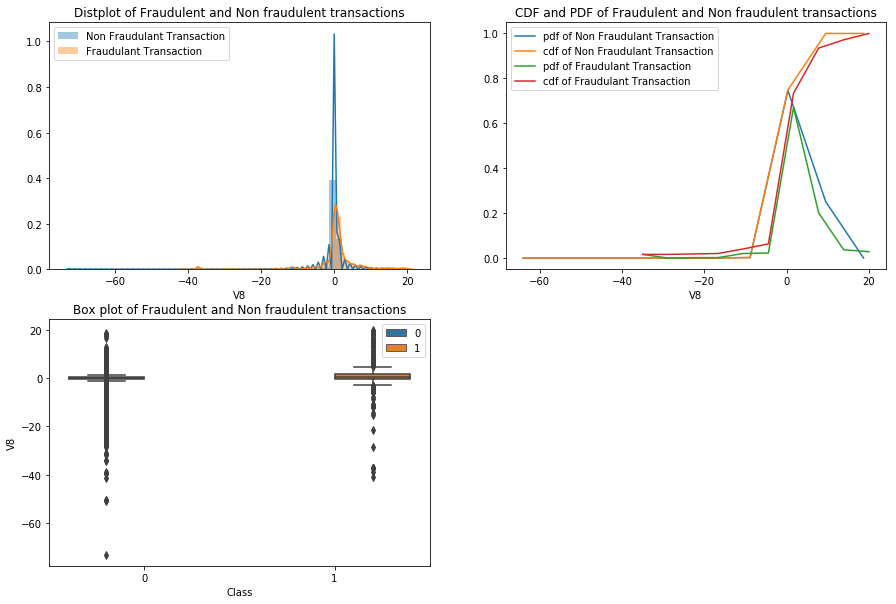

In [23]:
displayPlots(labelx = 'V8', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observation:

1) It is very difficult to predict whether a transaction is fraudulent or not throught distplot and cdf plot as the plots are overlapping.   
2) From box plot too, its very difficult to predict whether a given transaction is fraudulent or not. Also there are many outliers in both transactions fraudulent and non fraudulent.

[-6.29073039 -4.10215789 -1.91358539  0.27498711  2.46355961  4.65213211
  6.84070461  9.02927711 11.21784961 13.40642211 15.59499461]
[-1.34340663e+01 -1.17553072e+01 -1.00765481e+01 -8.39778896e+00
 -6.71902985e+00 -5.04027073e+00 -3.36151161e+00 -1.68275249e+00
 -3.99337572e-03  1.67476574e+00  3.35352486e+00]


<Figure size 432x288 with 0 Axes>

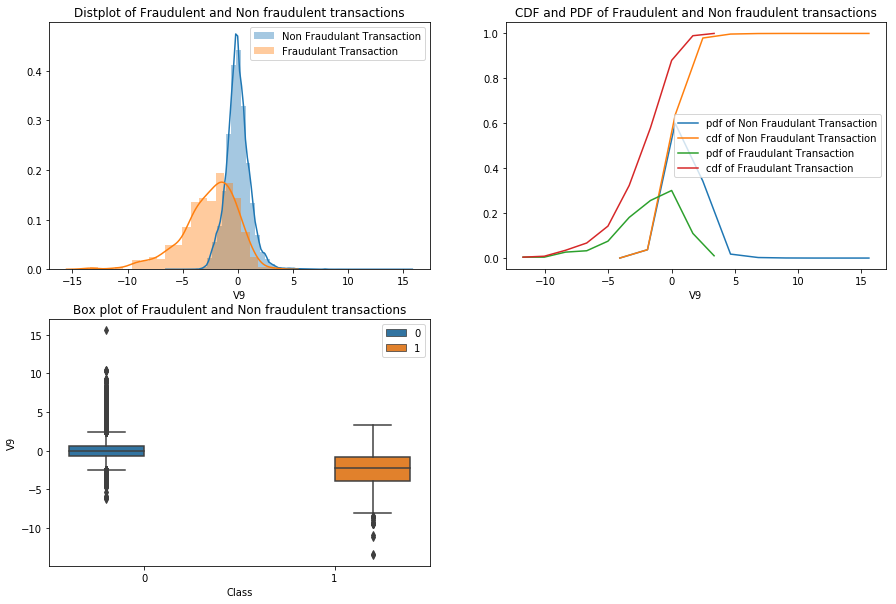

In [24]:
displayPlots(labelx = 'V9', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observation:

1) From Distplot, CDF and PDF plot we note that, there around 20% of fraudulent transactions for V9 below -5.  
2) From box plot, around 75% of fraudulent transactions are below 0. Also fraudulent and non fraudulent transactions have many outliers.  
3) Difficult to predict whether a given transaction is fraudulent or not from V9 feature.  

[-14.74109638 -10.89247313  -7.04384988  -3.19522663   0.65339662
   4.50201987   8.35064312  12.19926637  16.04788962  19.89651287
  23.74513612]
[-24.58826244 -21.72629269 -18.86432294 -16.00235319 -13.14038344
 -10.27841369  -7.41644394  -4.5544742   -1.69250445   1.1694653
   4.03143505]


<Figure size 432x288 with 0 Axes>

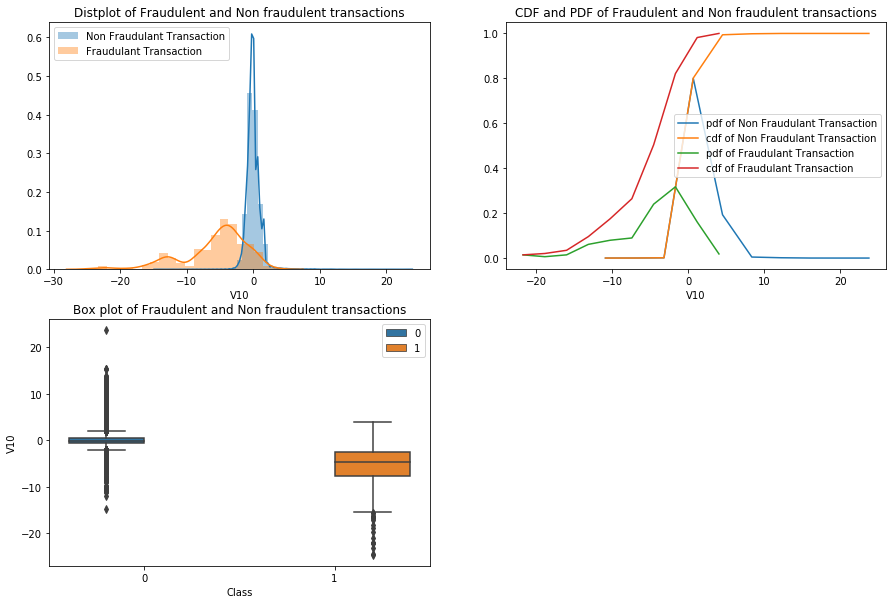

In [25]:
displayPlots(labelx = 'V10', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

1) From distplot and CDF plot, around 58% of fraudulent transactions for V10 are below -2. i.e. around 285 transactions are frauduluent. For V10 above -2, its very difficult to predict whether a transaction is fraudulent or not.  
2) From box plot, 75% of transactions are fraudulent below -2.  
3) Very Difficult to predict whether a given transaction is fraudulent or not.  

[-4.79747346 -3.3175071  -1.83754073 -0.35757436  1.12239201  2.60235838
  4.08232474  5.56229111  7.04225748  8.52222385 10.00219022]
[-1.7022284  -0.33011424  1.04199992  2.41411407  3.78622823  5.15834239
  6.53045655  7.90257071  9.27468487 10.64679902 12.01891318]


<Figure size 432x288 with 0 Axes>

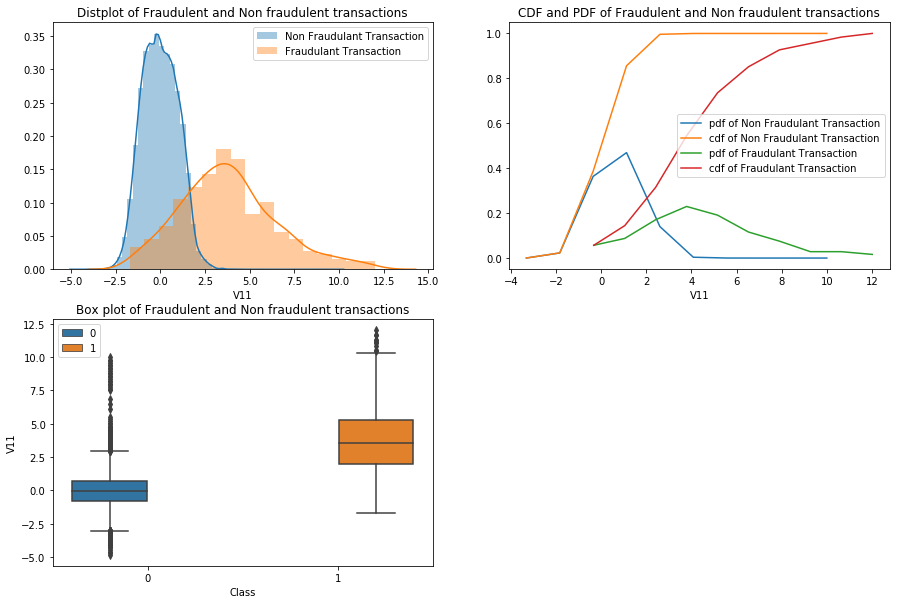

In [26]:
displayPlots(labelx = 'V11', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

1) From CDF, PDF and Distplot, since the plots for fraudulent and non fraudulent transactions are overlapping, its very difficult to predict whether a transaction is a fraudulent or not.    
2) 50% of the non fraudulent transactions are between -1 and +1 and 50% of fraudulent transactions are between 5 and 2.5. Again its very difficult to predict whether a transaction is a fraudulent or not. Outliers are present for non fraudulent transactions.  

[-15.14498822 -12.84565019 -10.54631216  -8.24697413  -5.9476361
  -3.64829807  -1.34896004   0.95037799   3.24971602   5.54905405
   7.84839208]
[-18.68371463 -16.67774903 -14.67178344 -12.66581784 -10.65985224
  -8.65388664  -6.64792104  -4.64195544  -2.63598985  -0.63002425
   1.37594135]


<Figure size 432x288 with 0 Axes>

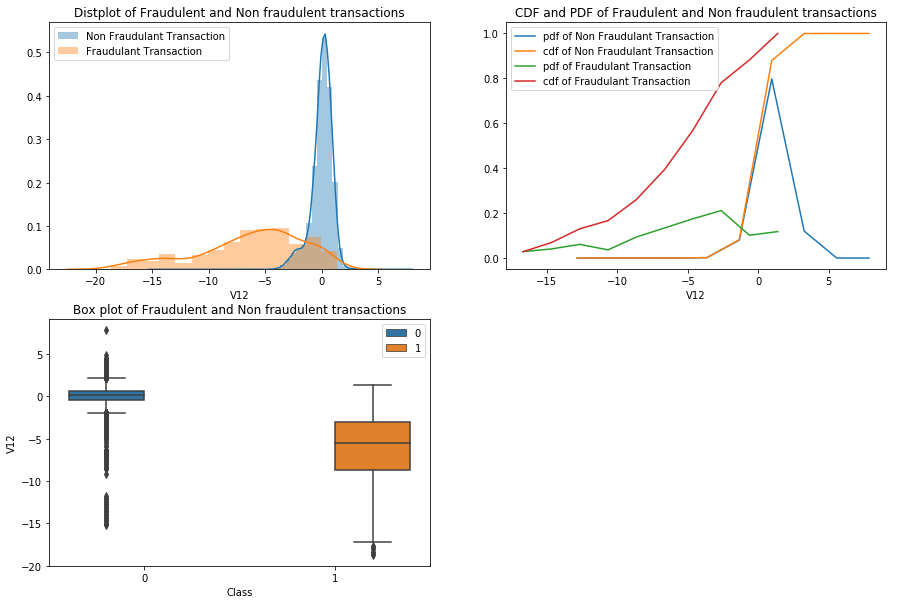

In [27]:
displayPlots(labelx = 'V12', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

1) From distplot and CDF plot, around 58% of fraudulent transactions for V12 are below -4. i.e. around 285 transactions are frauduluent. For V12 above -2, its very difficult to predict whether a transaction is fraudulent or not.  
2) From box plot, 75% of transactions are fraudulent below -4.  
3) Very Difficult to predict whether a given transaction is fraudulent or not.  

[-5.79188121 -4.50000479 -3.20812837 -1.91625196 -0.62437554  0.66750088
  1.95937729  3.25125371  4.54313013  5.83500654  7.12688296]
[-3.12779501 -2.53347153 -1.93914805 -1.34482456 -0.75050108 -0.1561776
  0.43814588  1.03246937  1.62679285  2.22111633  2.81543981]


<Figure size 432x288 with 0 Axes>

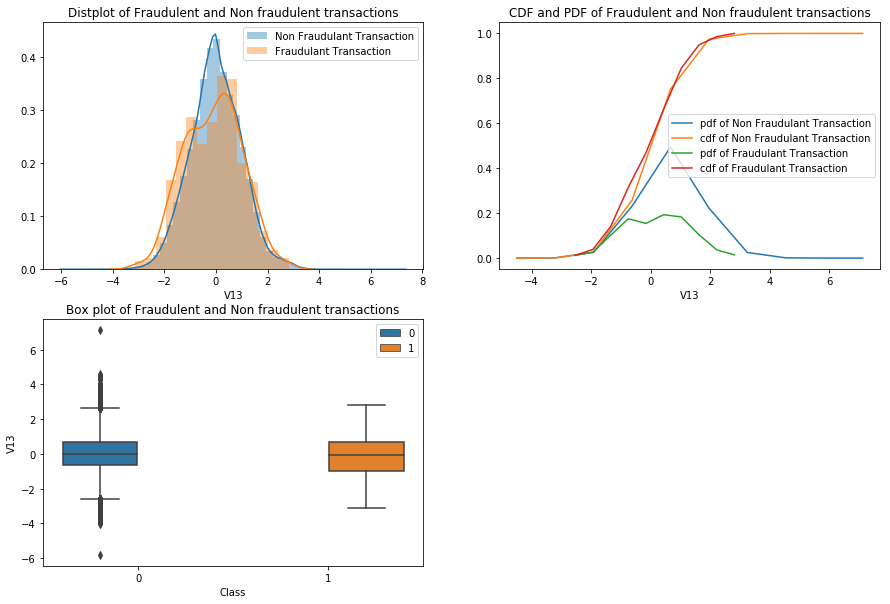

In [28]:
displayPlots(labelx = 'V13', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

Very difficult to predict whether a given transaction is fraudulent or not using V13 feature.

[-18.3920915  -15.50020574 -12.60831999  -9.71643423  -6.82454848
  -3.93266272  -1.04077697   1.85110879   4.74299454   7.6348803
  10.52676605]
[-19.21432549 -16.94865074 -14.68297599 -12.41730124 -10.1516265
  -7.88595175  -5.620277    -3.35460225  -1.0889275    1.17674725
   3.442422  ]


<Figure size 432x288 with 0 Axes>

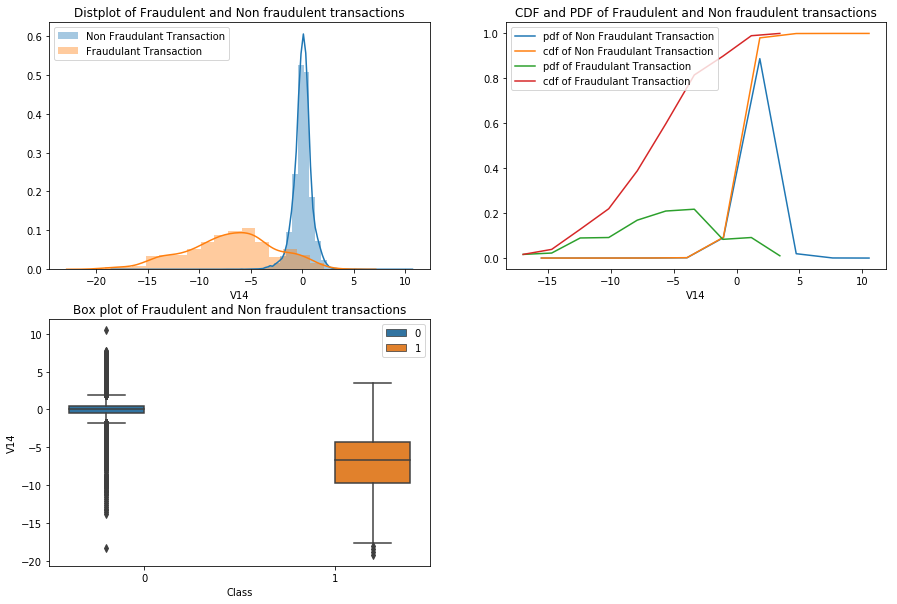

In [29]:
displayPlots(labelx = 'V14', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

1) From distplot and CDF plot, around 75% of fraudulent transactions for V14 are below -4. i.e. around 369 transactions are frauduluent. For V14 above -4, its very difficult to predict whether a transaction is fraudulent or not.  
2) From box plot, 75% of transactions are fraudulent below -4.  
3) Very Difficult to predict whether a given transaction is fraudulent or not.  

[-4.39130707 -3.0644022  -1.73749733 -0.41059247  0.9163124   2.24321726
  3.57012213  4.897027    6.22393186  7.55083673  8.8777416 ]
[-4.49894468 -3.80191442 -3.10488416 -2.4078539  -1.71082364 -1.01379339
 -0.31676313  0.38026713  1.07729739  1.77432765  2.4713579 ]


<Figure size 432x288 with 0 Axes>

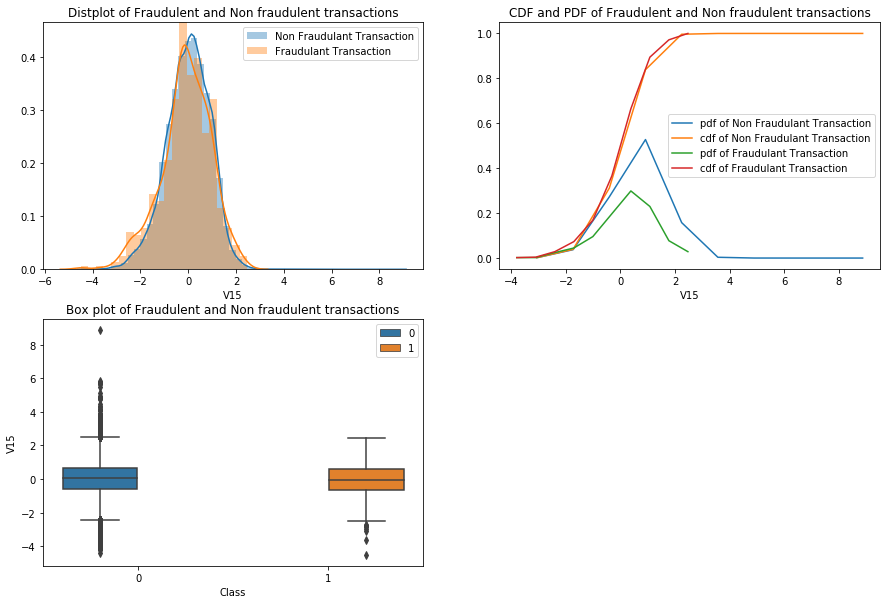

In [30]:
displayPlots(labelx = 'V15', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

Very difficult to predict whether a given transaction is fraudulent or not using V15 features.

[-10.11555995  -7.37249281  -4.62942566  -1.88635851   0.85670864
   3.59977578   6.34284293   9.08591008  11.82897722  14.57204437
  17.31511152]
[-14.12985452 -12.4029035  -10.67595248  -8.94900146  -7.22205045
  -5.49509943  -3.76814841  -2.04119739  -0.31424638   1.41270464
   3.13965566]


<Figure size 432x288 with 0 Axes>

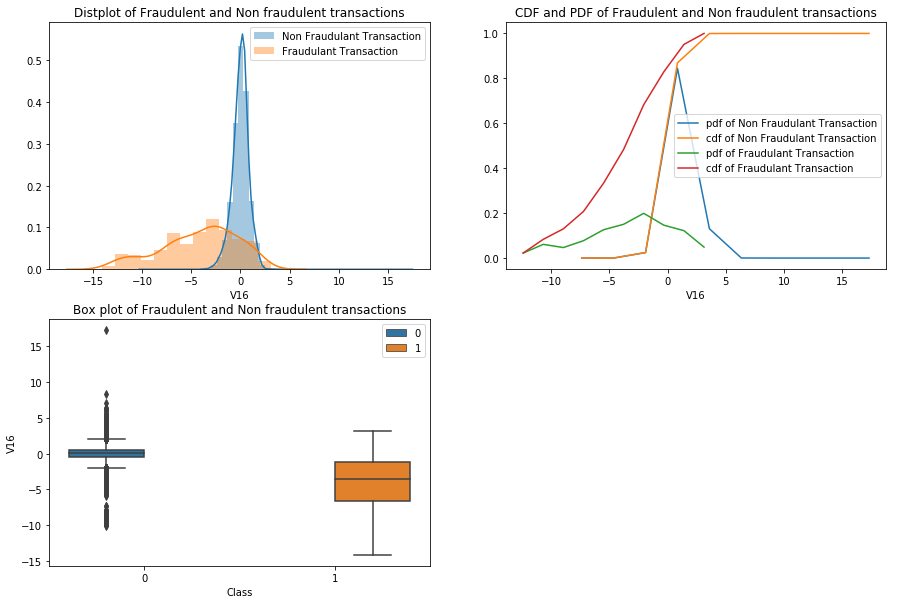

In [31]:
displayPlots(labelx = 'V16', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

1) From distplot and CDF plot, around 40% of fraudulent transactions for V16 are below -4. i.e. around 197 transactions are frauduluent. For V16 above -4, its very difficult to predict whether a transaction is fraudulent or not.  
2) From box plot, 75% of transactions are fraudulent below -2.  
3) Very Difficult to predict whether a given transaction is fraudulent or not.  

[-17.09844421 -14.46324717 -11.82805012  -9.19285307  -6.55765603
  -3.92245898  -1.28726194   1.34793511   3.98313216   6.6183292
   9.25352625]
[-25.16279937 -21.97258099 -18.78236262 -15.59214424 -12.40192587
  -9.21170749  -6.02148912  -2.83127074   0.35894763   3.54916601
   6.73938438]


<Figure size 432x288 with 0 Axes>

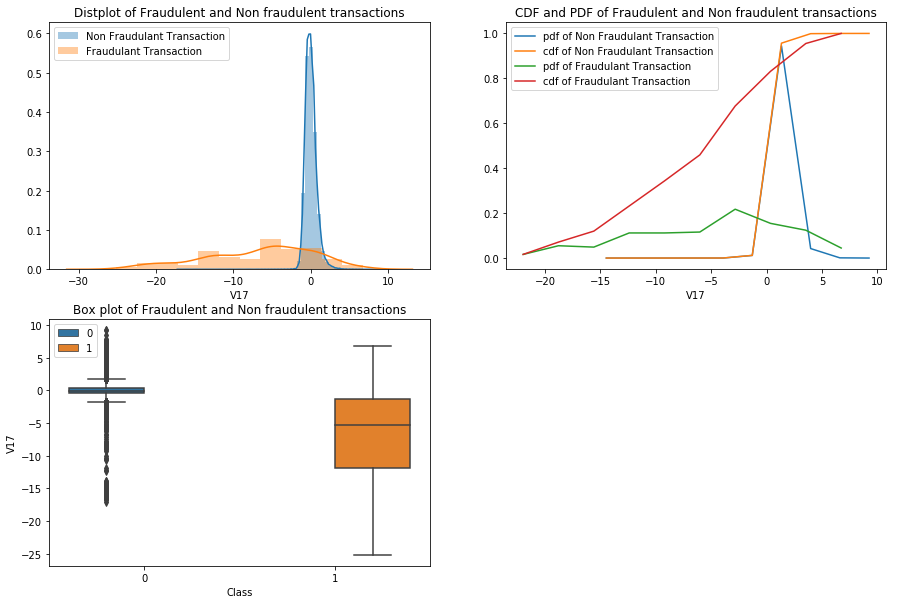

In [32]:
displayPlots(labelx = 'V17', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

1) From distplot and CDF plot, around 58% of fraudulent transactions for V17 are below -4. i.e. around 285 transactions are frauduluent. For V10 above -4, its very difficult to predict whether a transaction is fraudulent or not.  
2) From box plot, 75% of transactions are fraudulent below -2.  
3) Very Difficult to predict whether a given transaction is fraudulent or not.  

[-5.36665996 -4.32588704 -3.28511413 -2.24434121 -1.2035683  -0.16279539
  0.87797753  1.91875044  2.95952336  4.00029627  5.04106919]
[-9.49874592 -8.16983971 -6.84093349 -5.51202728 -4.18312107 -2.85421485
 -1.52530864 -0.19640243  1.13250379  2.46141     3.79031621]


<Figure size 432x288 with 0 Axes>

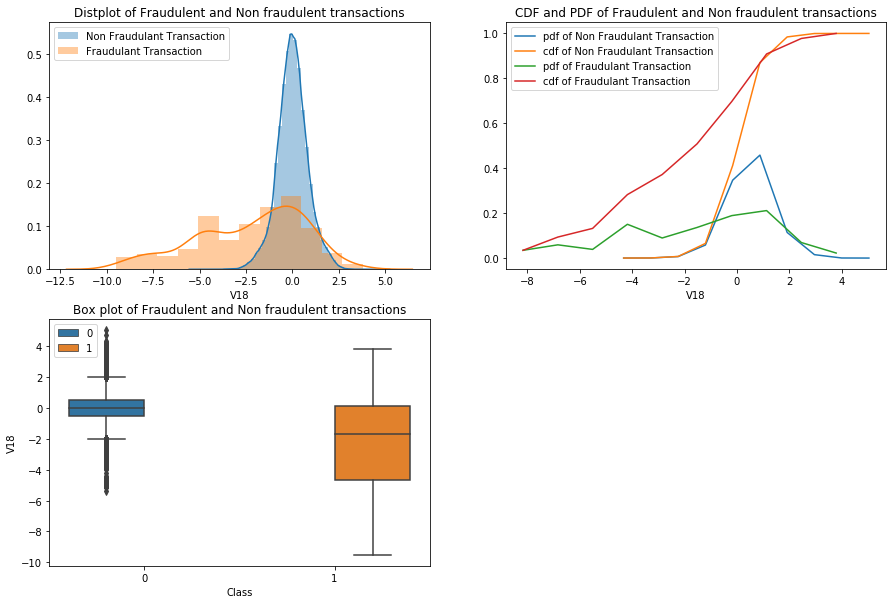

In [33]:
displayPlots(labelx = 'V18', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

Since the plots are overlapping, its very difficult to predict whether a given transaction is a fraudulent or not.

[-7.21352743 -5.93297754 -4.65242766 -3.37187777 -2.09132789 -0.810778
  0.46977188  1.75032177  3.03087166  4.31142154  5.59197143]
[-3.68190355 -2.79087902 -1.89985448 -1.00882995 -0.11780542  0.77321912
  1.66424365  2.55526819  3.44629272  4.33731726  5.22834179]


<Figure size 432x288 with 0 Axes>

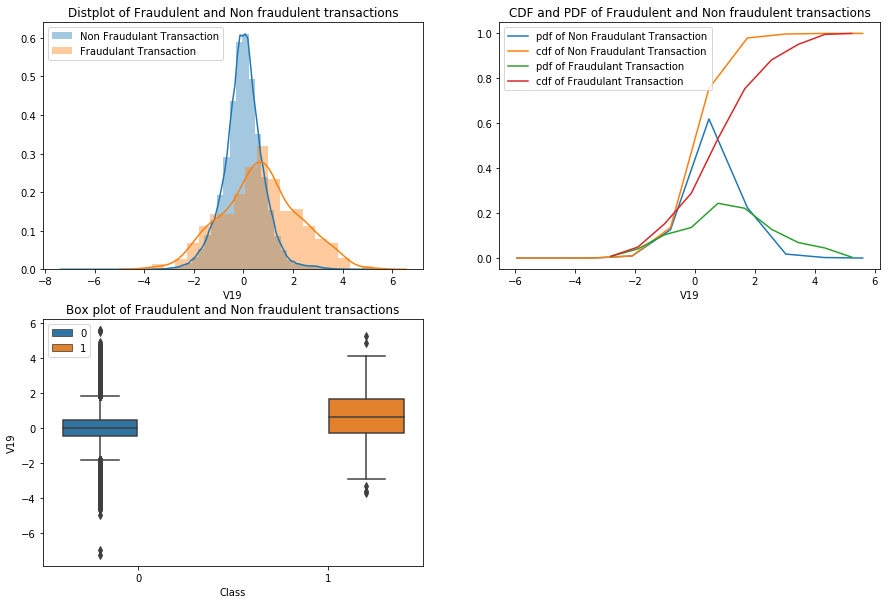

In [34]:
displayPlots(labelx = 'V19', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

Since the plots are overlapping, its very difficult to predict whether a given transaction is a fraudulent or not.

[-54.49772049 -45.10585802 -35.71399555 -26.32213307 -16.9302706
  -7.53840812   1.85345435  11.24531683  20.6371793   30.02904177
  39.42090425]
[-4.12818583 -2.60946682 -1.0907478   0.42797121  1.94669022  3.46540923
  4.98412824  6.50284726  8.02156627  9.54028528 11.05900429]


<Figure size 432x288 with 0 Axes>

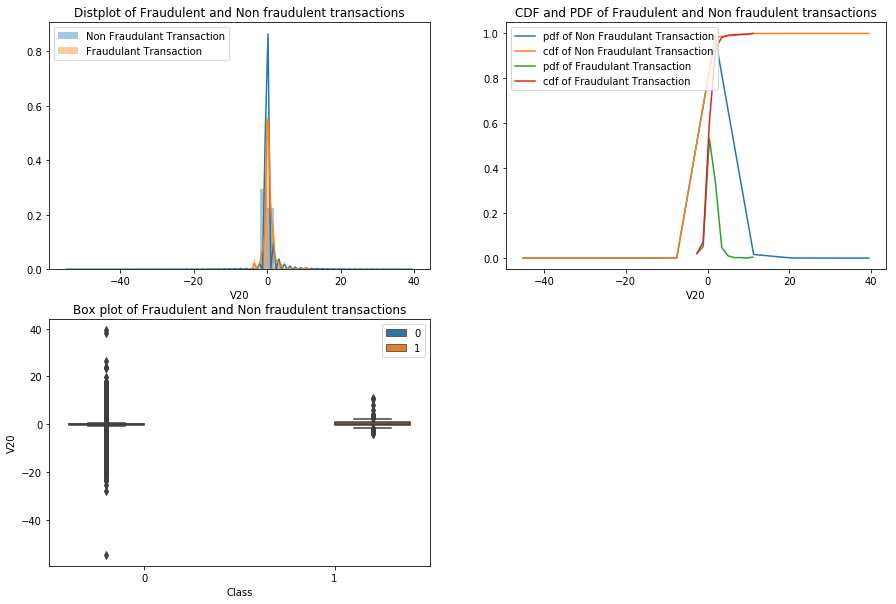

In [35]:
displayPlots(labelx = 'V20', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

Very difficult to predict whether the given transaction is fraudulent or not.

[-34.83038214 -29.08585499 -23.34132784 -17.59680069 -11.85227354
  -6.10774639  -0.36321924   5.38130791  11.12583507  16.87036222
  22.61488937]
[-22.79760391 -17.7975596  -12.79751529  -7.79747099  -2.79742668
   2.20261763   7.20266193  12.20270624  17.20275054  22.20279485
  27.20283916]


<Figure size 432x288 with 0 Axes>

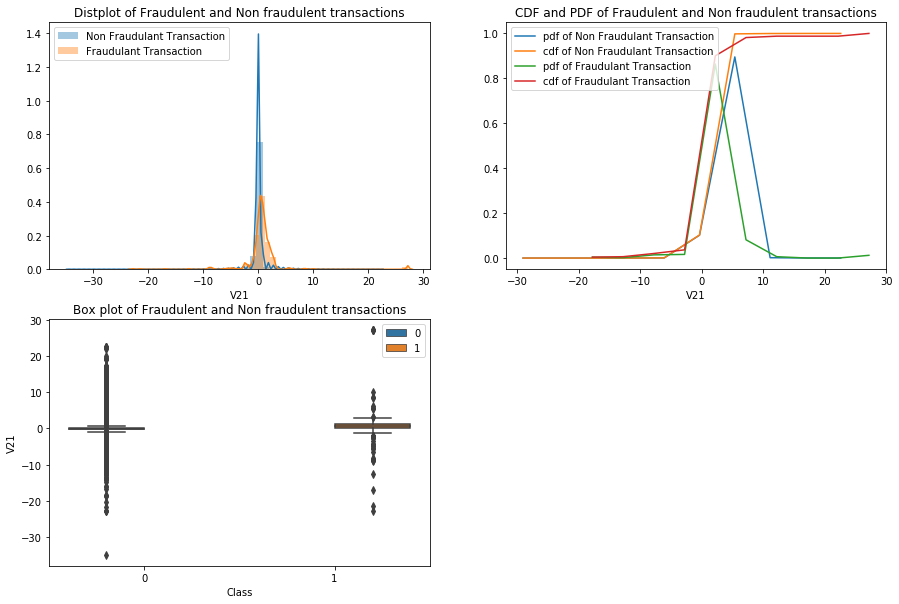

In [36]:
displayPlots(labelx = 'V21', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

Its very difficult to predict whether a given transaction is fraudulent or not, since all the plots are overlapping.

[-10.9331437   -8.78952032  -6.64589694  -4.50227356  -2.35865018
  -0.2150268    1.92859657   4.07221995   6.21584333   8.35946671
  10.50309009]
[-8.88701714 -7.16211691 -5.43721667 -3.71231644 -1.98741621 -0.26251597
  1.46238426  3.18728449  4.91218473  6.63708496  8.36198519]


<Figure size 432x288 with 0 Axes>

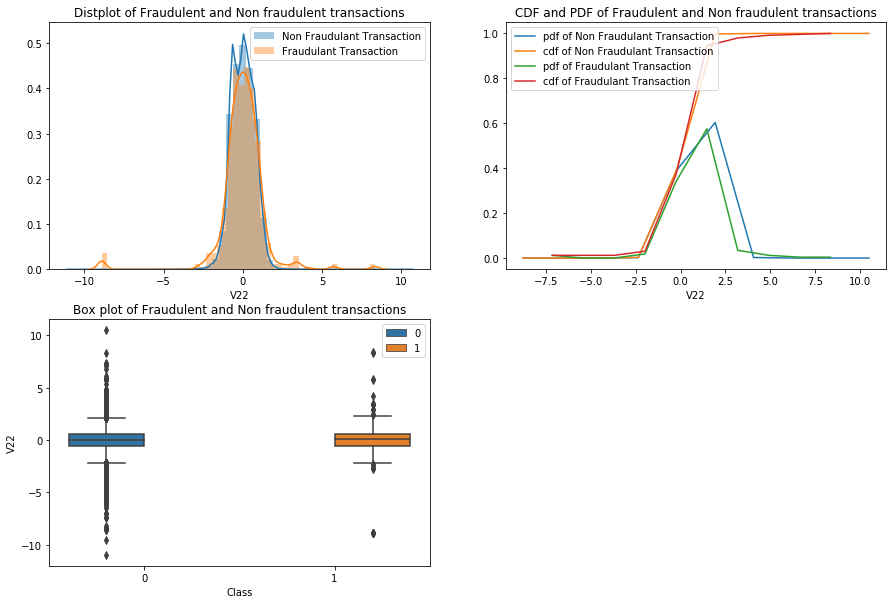

In [37]:
displayPlots(labelx = 'V22', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

Very difficult to predict whether a given transaction is fraudulent or not.

[-44.8077352  -38.07412051 -31.34050583 -24.60689114 -17.87327645
 -11.13966176  -4.40604707   2.32756762   9.06118231  15.794797
  22.52841169]
[-19.25432762 -16.78227186 -14.3102161  -11.83816035  -9.36610459
  -6.89404883  -4.42199307  -1.94993732   0.52211844   2.9941742
   5.46622995]


<Figure size 432x288 with 0 Axes>

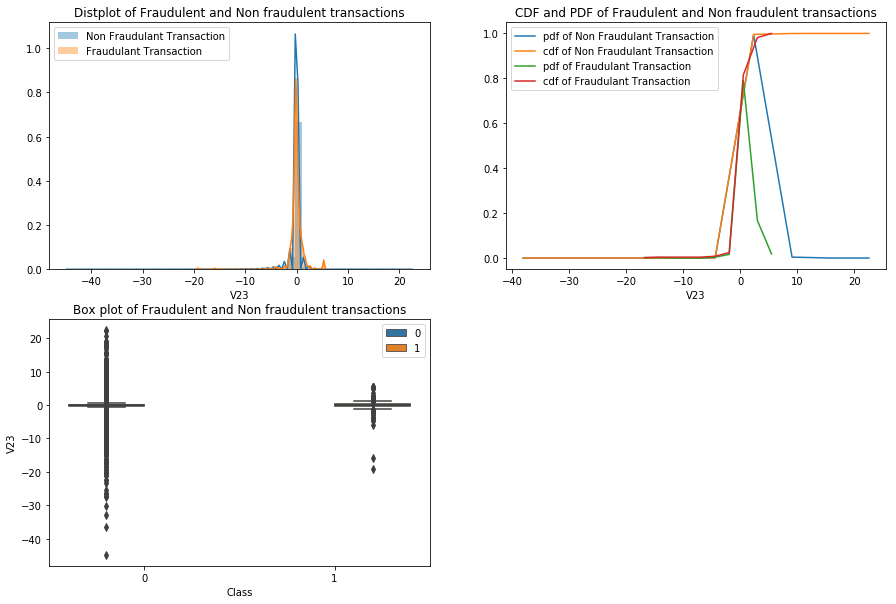

In [38]:
displayPlots(labelx = 'V23', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

Its very difficult to predict whether the given transaction is fraudulent or not, since all the plots are overlapping.

[-2.83662692 -2.09450931 -1.35239171 -0.6102741   0.1318435   0.87396111
  1.61607871  2.35819632  3.10031393  3.84243153  4.58454914]
[-2.02802423 -1.71607833 -1.40413244 -1.09218654 -0.78024064 -0.46829475
 -0.15634885  0.15559704  0.46754294  0.77948884  1.09143473]


<Figure size 432x288 with 0 Axes>

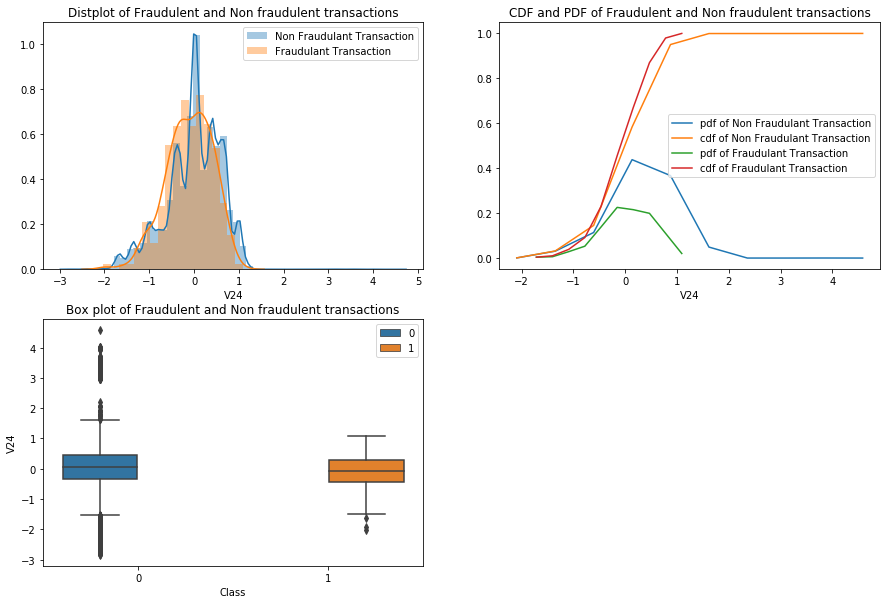

In [39]:
displayPlots(labelx = 'V24', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

Its very difficult to predict whether the given transaction is fraudulent or not, since all the plots are overlapping.

[-10.29539707  -8.5138985   -6.73239992  -4.95090135  -3.16940277
  -1.3879042    0.39359438   2.17509295   3.95659153   5.7380901
   7.51958868]
[-4.78160552 -4.08262405 -3.38364258 -2.68466111 -1.98567964 -1.28669817
 -0.5877167   0.11126477  0.81024624  1.50922771  2.20820918]


<Figure size 432x288 with 0 Axes>

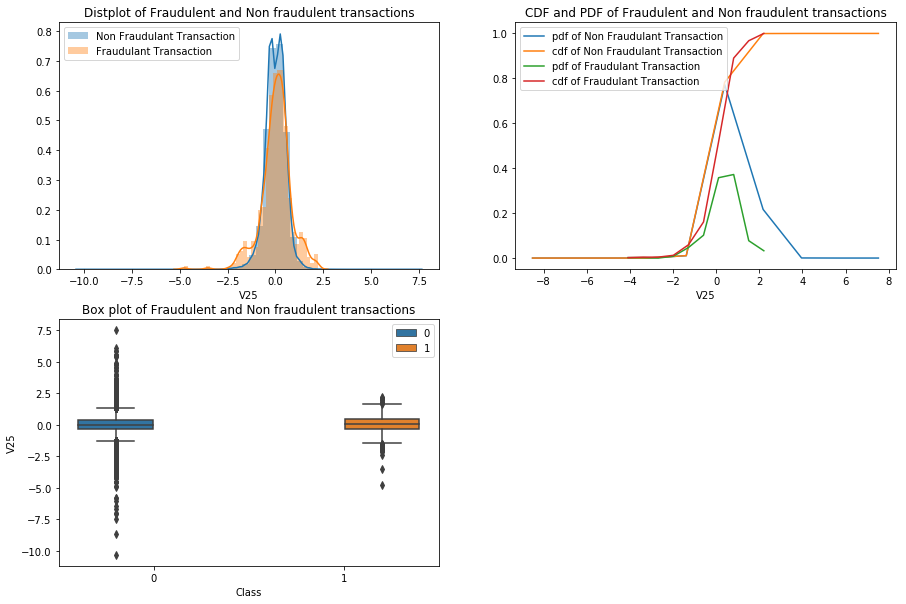

In [40]:
displayPlots(labelx = 'V25', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

Its very difficult to predict whether the given transaction is fraudulent or not, since all the plots are overlapping.

[-2.60455055 -1.99236094 -1.38017132 -0.7679817  -0.15579209  0.45639753
  1.06858715  1.68077676  2.29296638  2.905156    3.51734561]
[-1.15267107 -0.76287789 -0.37308472  0.01670846  0.40650163  0.7962948
  1.18608798  1.57588115  1.96567432  2.3554675   2.74526067]


<Figure size 432x288 with 0 Axes>

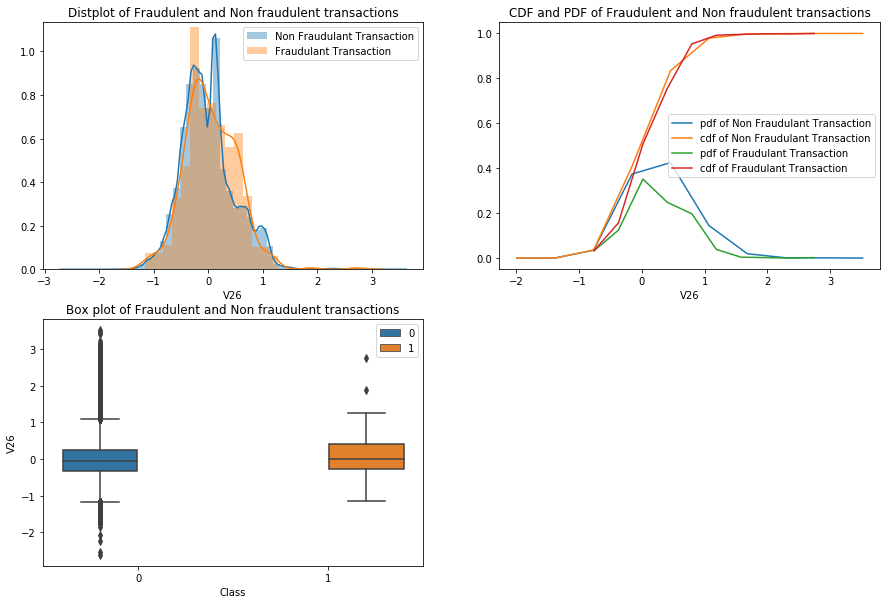

In [41]:
displayPlots(labelx = 'V26', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

Its very difficult to predict whether the given transaction is fraudulent or not, since all the plots are overlapping.

[-22.56567932 -17.14789158 -11.73010384  -6.31231609  -0.89452835
   4.52325939   9.94104714  15.35883488  20.77662262  26.19441036
  31.61219811]
[-7.26348215 -6.23189816 -5.20031418 -4.1687302  -3.13714621 -2.10556223
 -1.07397825 -0.04239426  0.98918972  2.0207737   3.05235769]


<Figure size 432x288 with 0 Axes>

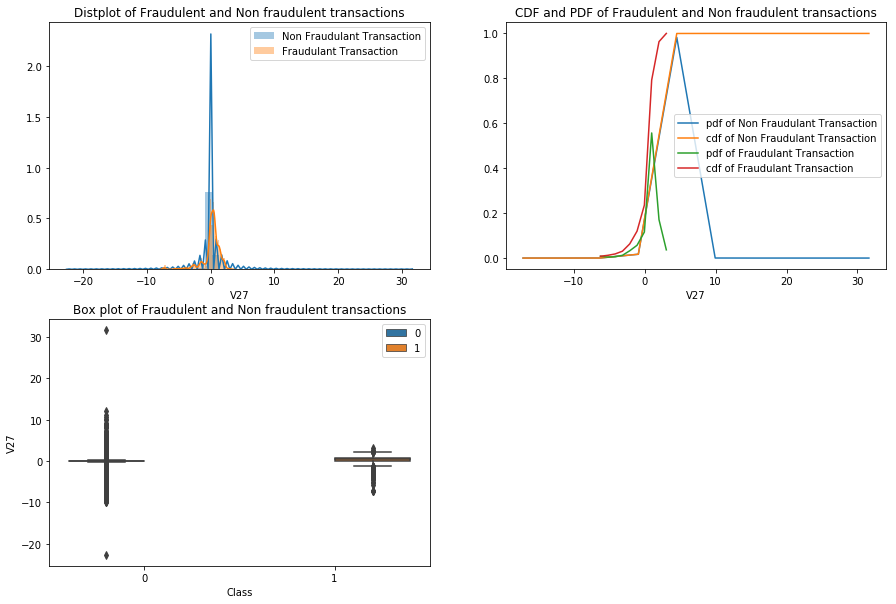

In [42]:
displayPlots(labelx = 'V27', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

Its very difficult to predict whether the given transaction is fraudulent or not, since all the plots are overlapping.

[-15.43008391 -10.50229473  -5.57450556  -0.64671639   4.28107278
   9.20886196  14.13665113  19.0644403   23.99222947  28.92001865
  33.84780782]
[-1.86929048 -1.50442504 -1.13955961 -0.77469418 -0.40982874 -0.04496331
  0.31990212  0.68476755  1.04963299  1.41449842  1.77936385]


<Figure size 432x288 with 0 Axes>

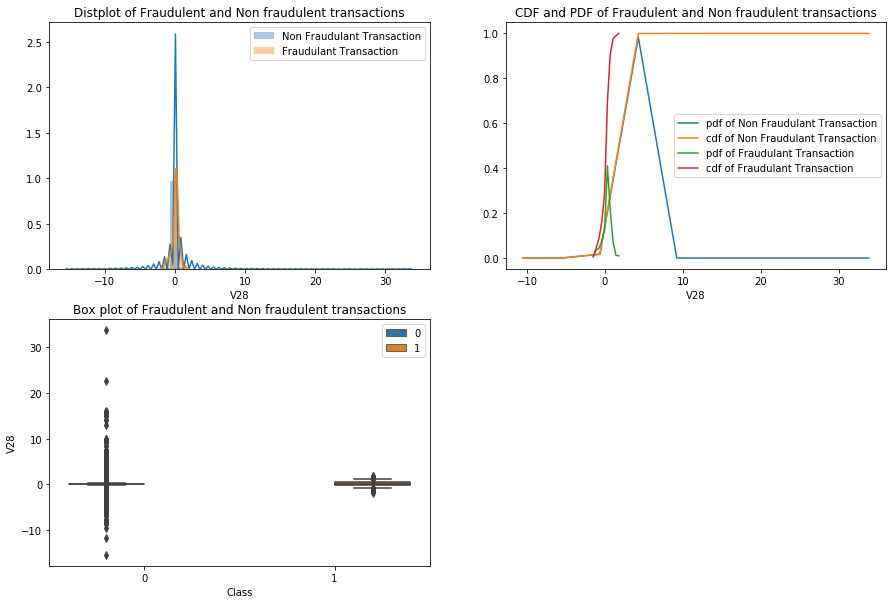

In [43]:
displayPlots(labelx = 'V28', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

Its very difficult to predict whether the given transaction is fraudulent or not, since all the plots are overlapping.

[    0.     2569.116  5138.232  7707.348 10276.464 12845.58  15414.696
 17983.812 20552.928 23122.044 25691.16 ]
[   0.     212.587  425.174  637.761  850.348 1062.935 1275.522 1488.109
 1700.696 1913.283 2125.87 ]


<Figure size 432x288 with 0 Axes>

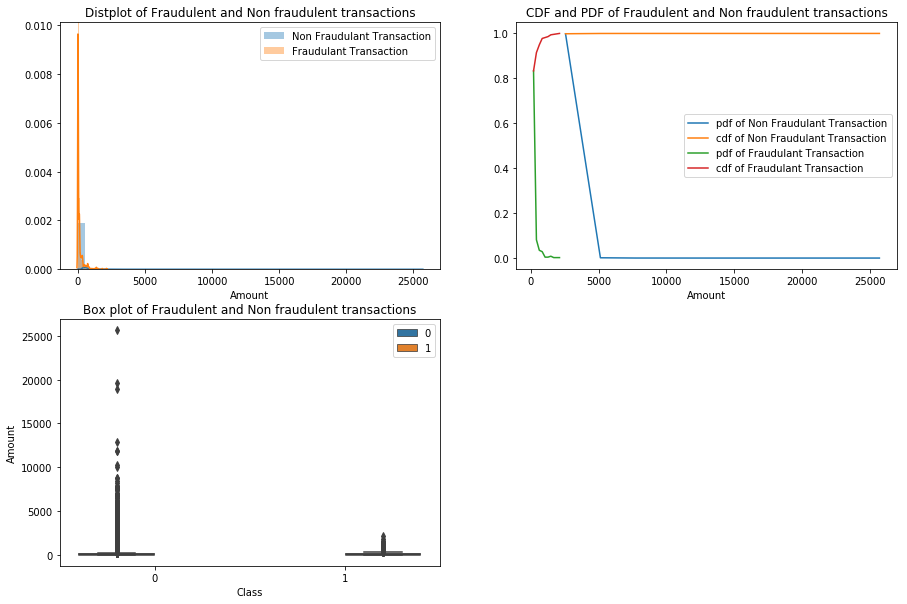

In [44]:
displayPlots(labelx = 'Amount', dataframename = dfccfraud, dataframename1= positiveTrans, dataframename2 = fraudTrans)

# Observations:

1) From distplot, CDF and PDF plot we see that fraudulent transactions have a amount less than approximately 2500 whereas all the non fraudulent transactions are above 2500. Hence if the transaction amount it less than 2500 we can say that the given transaction is fraudulent and if it is more than 2500, then it is a non fraudulent transaction.  
2) From box plot, we can see that there are many outliers in both fraudulent and non fraudulent transactions.  

# Bivariate Analysis:

For Bivariate Analysis we will only concentrate on time and amount features of credit card data set.

In [45]:
dfccfraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timeInHours
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556


Text(0.5,1,'Pair plots for fraudulent and non fraudulent transactions.')

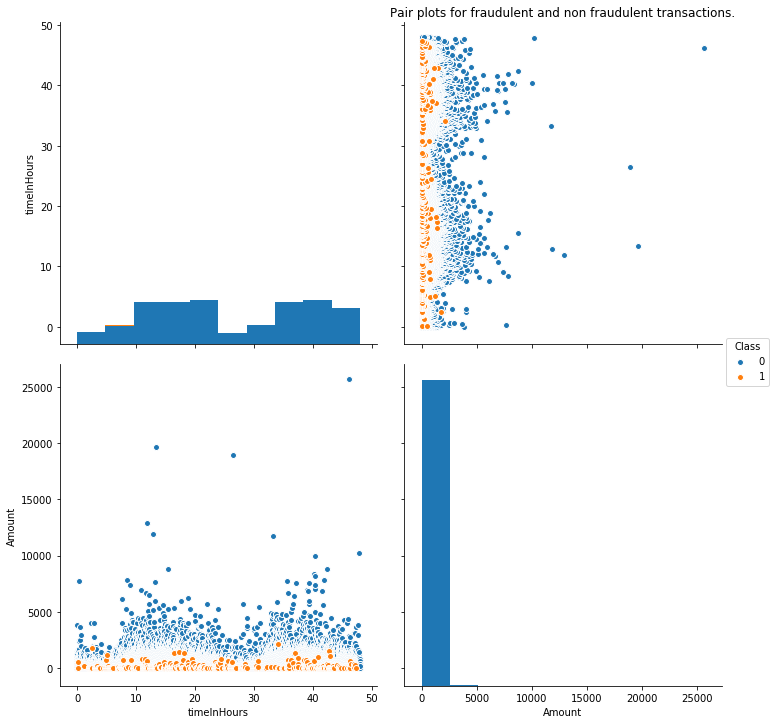

In [46]:
sns.pairplot(data = dfccfraud,hue = 'Class', vars=["timeInHours", "Amount"], size= 5)
plt.title("Pair plots for fraudulent and non fraudulent transactions.")

# Observations:
 From bivariate analysis, we can note that fraudulent and non fraudulent transactions have taken place in successive days. Its the amount feature which tells whether a transaction is fraudulent or not. If the transaction amount is less than approximately 2500, we can say that the transaction is fraudulent else the transaction in non fraudulent.

# Conclusions:

After doing an EDA of credit card dataset, we can conclude the following things:  
1) The dataset contains 284315 non fraudulent transaction and 492 fraudulent transactions.  
2) The dataset has transactions for two successive days. 
3) Inorder to determine whether a transaction is fraudulent or not, we have to look at the amount feature from the dataset. If amount is greater than 2500, the transaction is non fraudulent transaction else it is fraudulent. 

# Test for similarity

In [47]:
# Droping the column timeInHours from original credit card dataset, positive transaction data set and fraud transaction dataset.
dfccfraud.drop('timeInHours', axis= 1, inplace= True)
positiveTrans.drop('timeInHours', axis = 1, inplace = True)
fraudTrans.drop('timeInHours', axis = 1, inplace = True)


In [48]:
#Sampling the positive transaction dataset and fraud transaction data set to create a sample dataset consisting of 100 transactions of atleast two of fraud transaction dataset
dfsample = positiveTrans.sample(n = 98).append(fraudTrans.sample(n = 2))
# Sample Dataset having 98 non fraudulent and two fraudulent transactions.
dfsample['Class'].value_counts()

0    98
1     2
Name: Class, dtype: int64

In [49]:
dfsample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
227246,144995.0,1.970218,-0.156174,-3.096381,0.275247,2.910339,3.310792,0.042407,0.666058,0.041867,...,0.058994,0.210458,0.005919,0.708815,0.500544,-0.474782,-0.003831,-0.063150,36.60,0
233669,147653.0,-0.700349,0.725557,1.627050,-0.611283,0.492095,0.231018,0.837400,-0.701294,1.326774,...,0.140461,1.031567,-0.312432,0.703708,-0.286803,-0.332129,-0.725896,-0.407612,10.00,0
198892,132699.0,0.600186,-2.654198,-2.542308,0.456329,0.369346,1.677936,0.666785,0.210393,0.484479,...,0.443321,-0.041683,-0.466008,-0.858110,-0.373725,0.654709,-0.177613,0.028672,704.51,0
161452,114190.0,-0.839822,-0.103017,1.396949,-2.177437,-1.445606,-0.042305,0.996955,-0.242172,-0.777682,...,-0.113345,-0.315682,-0.081364,-0.059453,0.476000,-0.450188,-0.177175,-0.134581,231.00,0
98974,66903.0,1.237755,0.250180,0.176629,0.506046,-0.211590,-0.576450,-0.069051,0.001923,-0.104943,...,-0.265601,-0.831338,0.085012,-0.054993,0.207866,0.099614,-0.031454,0.015746,0.89,0


In [50]:
# program to display the index of sample dataset.
indexSample = dfsample.index
indexSample

Int64Index([227246, 233669, 198892, 161452,  98974,  68395, 250006, 102768,
            183031, 178704, 108193, 267149,   2198,  24702,  54604,  58416,
            230929, 247830, 137901, 148371, 260609,  66305, 269360, 284012,
            275681, 194912,  80255,   2897, 276392, 211833, 207138, 238626,
            192569, 148227,  59742, 211065, 281222, 109966, 181237,  19153,
             86898, 119699,  66915, 114356, 158937, 265052, 222367, 240370,
            195594, 207891, 266247, 101059, 120254, 269209, 129745,  93875,
            244733,  50034,  10045, 131143,   1102,  79740, 230092, 227030,
            125385, 137905, 190955,  18967,   6206, 205671, 189796, 233393,
             44544, 257986, 123273,  29772,  22027, 223642, 143767,  30259,
            134369,  83062, 231385, 203921, 153666,  40747, 242663,  98559,
            276402, 128807, 182109, 144106, 116324, 211600, 277106, 143855,
            266786,  14261,   6334,  42769],
           dtype='int64')

In [55]:
# Program to perform similarity test of two vectors.
def similarity(num1, num2):
    """Function to perform similarity between num1 and num2"""
    simiValue = [] # list defined to store the similarity values.
    transID = []  # list definde to store the indices of similarity values.
    # Program to perform similarity between num1 and num2.
    
    for x in range (0, len(num2)):
       # y = round(np.dot(num1,num2.loc[x])/(np.linalg.norm(num1)*np.linalg.norm(num2.loc[x])),10)
       # print(y)
        similarityValue = np.arccos(np.dot(num1,num2.loc[x])/(np.linalg.norm(num1)*np.linalg.norm(num2.loc[x]))) 
       # print(similarityValue)
        simiValue.append(similarityValue)
    simiValue = list([0 if math.isnan(x) else x for x in simiValue]) # removing nan values from the simivalue list.
    sortd_simivalue = sorted(simiValue) # similarity values stored in ascending order.
   
    # Program to store the index of the similarity values   
    for x in range(0,10):
        transID.append(simiValue.index(sortd_simivalue[x]))
        print("\n")
        print("Sr. No = %r )  class = %r  #  similarity = %r  #  transaction id = %r  "%((x+1) ,num1['Class'],sortd_simivalue[x],transID[x]))
    
    print("--------------------------------------------------------------------------------------------")
    return 

                  

In [56]:
#Program to perform and print the similarity values between sample dataset and credit card dataset.
for x in range(0,100):
    print("Given Transaction Id = %r  ,  class = %r "%(indexSample[x], dfsample.loc[indexSample[x]]['Class']))
    similarity(dfsample.loc[indexSample[x]], dfccfraud)
    
    

Given Transaction Id = 227246  ,  class = 0.0 


Sr. No = 1 )  class = 0.0  #  similarity = 0.0  #  transaction id = 227246  


Sr. No = 2 )  class = 0.0  #  similarity = 7.450133548693392e-06  #  transaction id = 193021  


Sr. No = 3 )  class = 0.0  #  similarity = 8.535361198399e-06  #  transaction id = 190539  


Sr. No = 4 )  class = 0.0  #  similarity = 9.689296020066786e-06  #  transaction id = 172963  


Sr. No = 5 )  class = 0.0  #  similarity = 1.0872355309143642e-05  #  transaction id = 205963  


Sr. No = 6 )  class = 0.0  #  similarity = 1.3772937820722111e-05  #  transaction id = 225829  


Sr. No = 7 )  class = 0.0  #  similarity = 1.4655820421294548e-05  #  transaction id = 175758  


Sr. No = 8 )  class = 0.0  #  similarity = 1.5378763605974958e-05  #  transaction id = 181625  


Sr. No = 9 )  class = 0.0  #  similarity = 1.5420599692972084e-05  #  transaction id = 226051  


Sr. No = 10 )  class = 0.0  #  similarity = 1.5732034574678428e-05  #  transaction id = 185100



Sr. No = 1 )  class = 0.0  #  similarity = 1.4901161193847656e-08  #  transaction id = 183031  


Sr. No = 2 )  class = 0.0  #  similarity = 1.4783746844609582e-05  #  transaction id = 232546  


Sr. No = 3 )  class = 0.0  #  similarity = 1.6767554394163075e-05  #  transaction id = 176960  


Sr. No = 4 )  class = 0.0  #  similarity = 1.932701286861828e-05  #  transaction id = 193846  


Sr. No = 5 )  class = 0.0  #  similarity = 2.1153451413637026e-05  #  transaction id = 253945  


Sr. No = 6 )  class = 0.0  #  similarity = 2.170685452693722e-05  #  transaction id = 163302  


Sr. No = 7 )  class = 0.0  #  similarity = 2.1813640847759976e-05  #  transaction id = 263521  


Sr. No = 8 )  class = 0.0  #  similarity = 2.441864792417723e-05  #  transaction id = 223223  


Sr. No = 9 )  class = 0.0  #  similarity = 2.485598554472714e-05  #  transaction id = 207727  


Sr. No = 10 )  class = 0.0  #  similarity = 2.508269578248675e-05  #  transaction id = 255895  
------------------------



Sr. No = 1 )  class = 0.0  #  similarity = 0.0  #  transaction id = 230929  


Sr. No = 2 )  class = 0.0  #  similarity = 1.1509784618697694e-05  #  transaction id = 212620  


Sr. No = 3 )  class = 0.0  #  similarity = 1.3856573689661014e-05  #  transaction id = 182750  


Sr. No = 4 )  class = 0.0  #  similarity = 1.4506002984095054e-05  #  transaction id = 250689  


Sr. No = 5 )  class = 0.0  #  similarity = 1.724482227493964e-05  #  transaction id = 221997  


Sr. No = 6 )  class = 0.0  #  similarity = 1.7922944232286224e-05  #  transaction id = 216660  


Sr. No = 7 )  class = 0.0  #  similarity = 1.8153700071388827e-05  #  transaction id = 275196  


Sr. No = 8 )  class = 0.0  #  similarity = 1.832648374572436e-05  #  transaction id = 229629  


Sr. No = 9 )  class = 0.0  #  similarity = 1.8788833909684375e-05  #  transaction id = 177783  


Sr. No = 10 )  class = 0.0  #  similarity = 1.9213503158384024e-05  #  transaction id = 253237  
----------------------------------------



Sr. No = 1 )  class = 0.0  #  similarity = 0  #  transaction id = 275681  


Sr. No = 2 )  class = 0.0  #  similarity = 1.843371813698352e-05  #  transaction id = 273739  


Sr. No = 3 )  class = 0.0  #  similarity = 1.8588169813623692e-05  #  transaction id = 219227  


Sr. No = 4 )  class = 0.0  #  similarity = 1.8960063241863326e-05  #  transaction id = 276804  


Sr. No = 5 )  class = 0.0  #  similarity = 1.898664069105135e-05  #  transaction id = 245807  


Sr. No = 6 )  class = 0.0  #  similarity = 1.8991493405027042e-05  #  transaction id = 203535  


Sr. No = 7 )  class = 0.0  #  similarity = 1.9835455033138548e-05  #  transaction id = 220681  


Sr. No = 8 )  class = 0.0  #  similarity = 2.0044991968917418e-05  #  transaction id = 255074  


Sr. No = 9 )  class = 0.0  #  similarity = 2.0154485685268405e-05  #  transaction id = 270183  


Sr. No = 10 )  class = 0.0  #  similarity = 2.015696438727598e-05  #  transaction id = 272144  
-------------------------------------------



Sr. No = 1 )  class = 0.0  #  similarity = 0.0  #  transaction id = 192569  


Sr. No = 2 )  class = 0.0  #  similarity = 1.723165151914233e-05  #  transaction id = 247424  


Sr. No = 3 )  class = 0.0  #  similarity = 1.7675804893040594e-05  #  transaction id = 271662  


Sr. No = 4 )  class = 0.0  #  similarity = 1.888666778782533e-05  #  transaction id = 245645  


Sr. No = 5 )  class = 0.0  #  similarity = 2.0295841048340504e-05  #  transaction id = 274160  


Sr. No = 6 )  class = 0.0  #  similarity = 2.043335549963636e-05  #  transaction id = 254741  


Sr. No = 7 )  class = 0.0  #  similarity = 2.0516252944796e-05  #  transaction id = 258645  


Sr. No = 8 )  class = 0.0  #  similarity = 2.066463893763497e-05  #  transaction id = 231581  


Sr. No = 9 )  class = 0.0  #  similarity = 2.0886936968922947e-05  #  transaction id = 222735  


Sr. No = 10 )  class = 0.0  #  similarity = 2.100958572155365e-05  #  transaction id = 237144  
----------------------------------------------



Sr. No = 1 )  class = 0.0  #  similarity = 1.4901161193847656e-08  #  transaction id = 86898  


Sr. No = 2 )  class = 0.0  #  similarity = 1.81382024274082e-05  #  transaction id = 95617  


Sr. No = 3 )  class = 0.0  #  similarity = 1.8524576780974714e-05  #  transaction id = 90769  


Sr. No = 4 )  class = 0.0  #  similarity = 2.4952593974044308e-05  #  transaction id = 88371  


Sr. No = 5 )  class = 0.0  #  similarity = 2.5545745185984835e-05  #  transaction id = 128412  


Sr. No = 6 )  class = 0.0  #  similarity = 2.9069908460971182e-05  #  transaction id = 112909  


Sr. No = 7 )  class = 0.0  #  similarity = 2.909815262110837e-05  #  transaction id = 85013  


Sr. No = 8 )  class = 0.0  #  similarity = 2.9155392808088636e-05  #  transaction id = 109877  


Sr. No = 9 )  class = 0.0  #  similarity = 2.960155333668111e-05  #  transaction id = 118692  


Sr. No = 10 )  class = 0.0  #  similarity = 2.964672807600418e-05  #  transaction id = 131702  
-----------------------------



Sr. No = 1 )  class = 0.0  #  similarity = 0.0  #  transaction id = 195594  


Sr. No = 2 )  class = 0.0  #  similarity = 1.4711484106056436e-05  #  transaction id = 208049  


Sr. No = 3 )  class = 0.0  #  similarity = 1.6497160286076497e-05  #  transaction id = 231193  


Sr. No = 4 )  class = 0.0  #  similarity = 1.6498721521767816e-05  #  transaction id = 166440  


Sr. No = 5 )  class = 0.0  #  similarity = 1.6550830486979238e-05  #  transaction id = 166783  


Sr. No = 6 )  class = 0.0  #  similarity = 1.672395632137211e-05  #  transaction id = 167546  


Sr. No = 7 )  class = 0.0  #  similarity = 1.6755134936101336e-05  #  transaction id = 201010  


Sr. No = 8 )  class = 0.0  #  similarity = 1.7159681898739815e-05  #  transaction id = 172241  


Sr. No = 9 )  class = 0.0  #  similarity = 1.7371692938089995e-05  #  transaction id = 263614  


Sr. No = 10 )  class = 0.0  #  similarity = 1.7818355957538003e-05  #  transaction id = 249817  
---------------------------------------



Sr. No = 1 )  class = 0.0  #  similarity = 0.0  #  transaction id = 244733  


Sr. No = 2 )  class = 0.0  #  similarity = 9.381816529451472e-07  #  transaction id = 236903  


Sr. No = 3 )  class = 0.0  #  similarity = 1.0569325462762211e-06  #  transaction id = 254032  


Sr. No = 4 )  class = 0.0  #  similarity = 1.1245194640592873e-06  #  transaction id = 235341  


Sr. No = 5 )  class = 0.0  #  similarity = 1.223892521761796e-06  #  transaction id = 234482  


Sr. No = 6 )  class = 0.0  #  similarity = 1.2462752550904616e-06  #  transaction id = 234297  


Sr. No = 7 )  class = 0.0  #  similarity = 1.3937963439790668e-06  #  transaction id = 232977  


Sr. No = 8 )  class = 0.0  #  similarity = 1.8264107149788824e-06  #  transaction id = 260669  


Sr. No = 9 )  class = 0.0  #  similarity = 1.8921541189375334e-06  #  transaction id = 261258  


Sr. No = 10 )  class = 0.0  #  similarity = 1.975289294696835e-06  #  transaction id = 228145  
-----------------------------------------



Sr. No = 1 )  class = 0.0  #  similarity = 0.0  #  transaction id = 125385  


Sr. No = 2 )  class = 0.0  #  similarity = 6.221308323292601e-05  #  transaction id = 130661  


Sr. No = 3 )  class = 0.0  #  similarity = 6.282084442785836e-05  #  transaction id = 134396  


Sr. No = 4 )  class = 0.0  #  similarity = 6.454290171596426e-05  #  transaction id = 132438  


Sr. No = 5 )  class = 0.0  #  similarity = 6.479458062968473e-05  #  transaction id = 106088  


Sr. No = 6 )  class = 0.0  #  similarity = 6.489609158964774e-05  #  transaction id = 111380  


Sr. No = 7 )  class = 0.0  #  similarity = 6.539306638245323e-05  #  transaction id = 111978  


Sr. No = 8 )  class = 0.0  #  similarity = 6.724995743662176e-05  #  transaction id = 141952  


Sr. No = 9 )  class = 0.0  #  similarity = 6.840585915490916e-05  #  transaction id = 114816  


Sr. No = 10 )  class = 0.0  #  similarity = 7.07765659833601e-05  #  transaction id = 89990  
-------------------------------------------------



Sr. No = 1 )  class = 0.0  #  similarity = 0.0  #  transaction id = 44544  


Sr. No = 2 )  class = 0.0  #  similarity = 5.522727175442495e-05  #  transaction id = 40464  


Sr. No = 3 )  class = 0.0  #  similarity = 8.925973176161953e-05  #  transaction id = 78906  


Sr. No = 4 )  class = 0.0  #  similarity = 9.105734936266385e-05  #  transaction id = 73093  


Sr. No = 5 )  class = 0.0  #  similarity = 9.181845965678924e-05  #  transaction id = 135547  


Sr. No = 6 )  class = 0.0  #  similarity = 9.374404360227345e-05  #  transaction id = 190895  


Sr. No = 7 )  class = 0.0  #  similarity = 9.57372332338537e-05  #  transaction id = 60695  


Sr. No = 8 )  class = 0.0  #  similarity = 0.0001013080033499506  #  transaction id = 25003  


Sr. No = 9 )  class = 0.0  #  similarity = 0.00010230961811294838  #  transaction id = 18679  


Sr. No = 10 )  class = 0.0  #  similarity = 0.0001024742444168163  #  transaction id = 61816  
-------------------------------------------------------



Sr. No = 1 )  class = 0.0  #  similarity = 0  #  transaction id = 134369  


Sr. No = 2 )  class = 0.0  #  similarity = 2.7247966084770218e-05  #  transaction id = 133359  


Sr. No = 3 )  class = 0.0  #  similarity = 3.57142040220321e-05  #  transaction id = 110001  


Sr. No = 4 )  class = 0.0  #  similarity = 3.835325293954107e-05  #  transaction id = 164758  


Sr. No = 5 )  class = 0.0  #  similarity = 3.857088650888738e-05  #  transaction id = 125851  


Sr. No = 6 )  class = 0.0  #  similarity = 4.006287413295409e-05  #  transaction id = 229025  


Sr. No = 7 )  class = 0.0  #  similarity = 4.048097292043454e-05  #  transaction id = 164383  


Sr. No = 8 )  class = 0.0  #  similarity = 4.159400978200866e-05  #  transaction id = 138500  


Sr. No = 9 )  class = 0.0  #  similarity = 4.212679501427351e-05  #  transaction id = 108717  


Sr. No = 10 )  class = 0.0  #  similarity = 4.271248580882241e-05  #  transaction id = 176913  
-------------------------------------------------



Sr. No = 1 )  class = 0.0  #  similarity = 0  #  transaction id = 276402  


Sr. No = 2 )  class = 0.0  #  similarity = 3.718489160654833e-06  #  transaction id = 276814  


Sr. No = 3 )  class = 0.0  #  similarity = 4.276347690780486e-06  #  transaction id = 282267  


Sr. No = 4 )  class = 0.0  #  similarity = 6.249682726735801e-06  #  transaction id = 273228  


Sr. No = 5 )  class = 0.0  #  similarity = 6.687501028929417e-06  #  transaction id = 284084  


Sr. No = 6 )  class = 0.0  #  similarity = 6.884868635331262e-06  #  transaction id = 237447  


Sr. No = 7 )  class = 0.0  #  similarity = 6.939302939911549e-06  #  transaction id = 275395  


Sr. No = 8 )  class = 0.0  #  similarity = 7.3301142927381825e-06  #  transaction id = 276471  


Sr. No = 9 )  class = 0.0  #  similarity = 7.70862575538055e-06  #  transaction id = 283703  


Sr. No = 10 )  class = 0.0  #  similarity = 7.751669414873374e-06  #  transaction id = 263865  
-------------------------------------------------



Sr. No = 1 )  class = 0.0  #  similarity = 0  #  transaction id = 266786  


Sr. No = 2 )  class = 0.0  #  similarity = 6.203090490407744e-06  #  transaction id = 264561  


Sr. No = 3 )  class = 0.0  #  similarity = 9.447253934645517e-06  #  transaction id = 215166  


Sr. No = 4 )  class = 0.0  #  similarity = 1.1696965443013667e-05  #  transaction id = 255983  


Sr. No = 5 )  class = 0.0  #  similarity = 1.2287812309395075e-05  #  transaction id = 171928  


Sr. No = 6 )  class = 0.0  #  similarity = 1.3933956237041005e-05  #  transaction id = 260877  


Sr. No = 7 )  class = 0.0  #  similarity = 1.4183502597441722e-05  #  transaction id = 189520  


Sr. No = 8 )  class = 0.0  #  similarity = 1.4310856749686536e-05  #  transaction id = 223885  


Sr. No = 9 )  class = 0.0  #  similarity = 1.434646778528844e-05  #  transaction id = 251189  


Sr. No = 10 )  class = 0.0  #  similarity = 1.4473622976785342e-05  #  transaction id = 258818  
-------------------------------------------

# END